## Problem Statement:

### Perform Principal Component Analysis (PCA) and perform clustering using first 3 principal component scores (Both Heirarchial and KMeans clustering-Scree Plot or Elbow Curve. Obtain the optimum number of clusters and check whether we have obtained same number of clusters with the original data 
### (Class column we have ignored at the begining who shows it has 3 clusters) df

### Perform Principal component analysis and perform clustering:

1. Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.


2. It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.


3. Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

# 1. Import Necessary Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Required Libraries for Clustering:
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import sklearn.cluster as skc
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.cluster import AgglomerativeClustering, KMeans,  DBSCAN
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

# 2. Importing Data / Dataset:

In [2]:
wine_data = pd.read_csv('Wine.csv')
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

**Wine data are the results of a chemical analysis of wines grown in same region in ITALY but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.**

**Number of Attributes:** 13 numeric

**Predictive attributes and class Attribute Information:** Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Phenols, Flavanoids, Nonflavanoid, phenols Proanthocyanins, Color intensity, Hue, Dilution, and Proline.

# 3. Data understanding / exploration:

In [3]:
wine_data.shape

(178, 14)

In [4]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
wine_data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [9]:
wine_data.Type.unique()

array([1, 2, 3], dtype=int64)

In [10]:
wine_data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [11]:
wine_data['ID'] = range(1, 179, 1) #Adding 'ID' as a column:
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  
0           0.28             2.29   5.64  1.04      3.92     1065   1  
1           0.26             1.28   4.38  1.05      3.40     1050   2  
2           0.30             2.81   5.68  1.03      3.17     1185   3  
3           0.24             2.18   7.80  0.86      3.45     1480   4  
4           0.39             1.82   4.32  1.04      2.93      735   5

#### Dropping 'Type' Feature: As it is a classifier that we have three types of wines which we need to find in clustering. By keeping, it will affect our inferences and further analysis.

In [12]:
wine_data_df = wine_data.drop('Type', axis=1)
wine_data_df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  
0           0.28             2.29   5.64  1.04      3.92     1065   1  
1           0.26             1.28   4.38  1.05      3.40     1050   2  
2           0.30             2.81   5.68  1.03      3.17     1185   3  
3           0.24             2.18   7.80  0.86      3.45     1480   4  
4           0.39             1.82   4.32  1.04      2.93      735   5

In [13]:
# Data display customization:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

#### Descriptive Statistics:

In [14]:
wine_data_df.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean   13.000618   2.336348    2.366517    19.494944   99.741573   2.295112     
std    0.811827    1.117146    0.274344    3.339564    14.282484   0.625851     
min    11.030000   0.740000    1.360000    10.600000   70.000000   0.980000     
25%    12.362500   1.602500    2.210000    17.200000   88.000000   1.742500     
50%    13.050000   1.865000    2.360000    19.500000   98.000000   2.355000     
75%    13.677500   3.082500    2.557500    21.500000   107.000000  2.800000     
max    14.830000   5.800000    3.230000    30.000000   162.000000  3.880000     

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean   2.029270    0.361854       1.590899         5.058090    0.957449     
std    0.998859    0.124453       0.572359         2.318286    0.228572     
min    0.340000    0.130000       0.410000         1.280000    0.480000     
25%    1.205000    0.270000       1.250000         3.220000    0.782500     
50%    2.135000    0.340000       1.555000         4.690000    0.965000     
75%    2.875000    0.437500       1.950000         6.200000    1.120000     
max    5.080000    0.660000       3.580000         13.000000   1.710000     

         Dilution      Proline          ID  
count  178.000000  178.000000   178.000000  
mean   2.611685    746.893258   89.500000   
std    0.709990    314.907474   51.528309   
min    1.270000    278.000000   1.000000    
25%    1.937500    500.500000   45.250000   
50%    2.780000    673.500000   89.500000   
75%    3.170000    985.000000   133.750000  
max    4.000000    1680.000000  178.000000

In [15]:
# After checking the above values, it has been observed that every feature is having different scale of values.

In [16]:
wine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### Missing values:

In [17]:
null_count_column = wine_data_df.isnull().sum().value_counts(ascending=False)

null_percent_column = (wine_data_df.isnull().sum() * 100 / len(wine_data_df)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_column, "\n")
print("Null Percentage for Columns:\n\n", null_percent_column)

Null Count for Columns:

 0    14
dtype: int64 

Null Percentage for Columns:

 0.0    14
dtype: int64


In [18]:
null_count_row = wine_data_df.isnull().sum(axis=1).value_counts(ascending=False)

null_percent_row = (wine_data.isnull().sum(axis=1) * 100 / len(wine_data_df)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    178
dtype: int64 

Null Percentage for Rows:

 0.0    178
dtype: int64


#### Duplicated Values:

In [19]:
wine_data_df.duplicated().sum()

0

In [20]:
wine_data[wine_data_df.duplicated()]

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline, ID]
Index: []

## 3.1  Exploratory Data Analysis (EDA):

### Checking Skewness:

1. A normally distribuited data has a skewness close to zero.
2. Skewness greather than zero means that there is more weight in the left side of the data.
3. In another hand, skewness smaller than 0 means that there is more weight in the right side of the data

In [21]:
wine_data_df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

### Plotting Histogram:

**To visualize the data distribution for each feature, histogram method can bring fast insights as:**

1. Check the kind of each feature distribution
2. Check data symmetry
3. Verify features frequency
4. Identify outliers

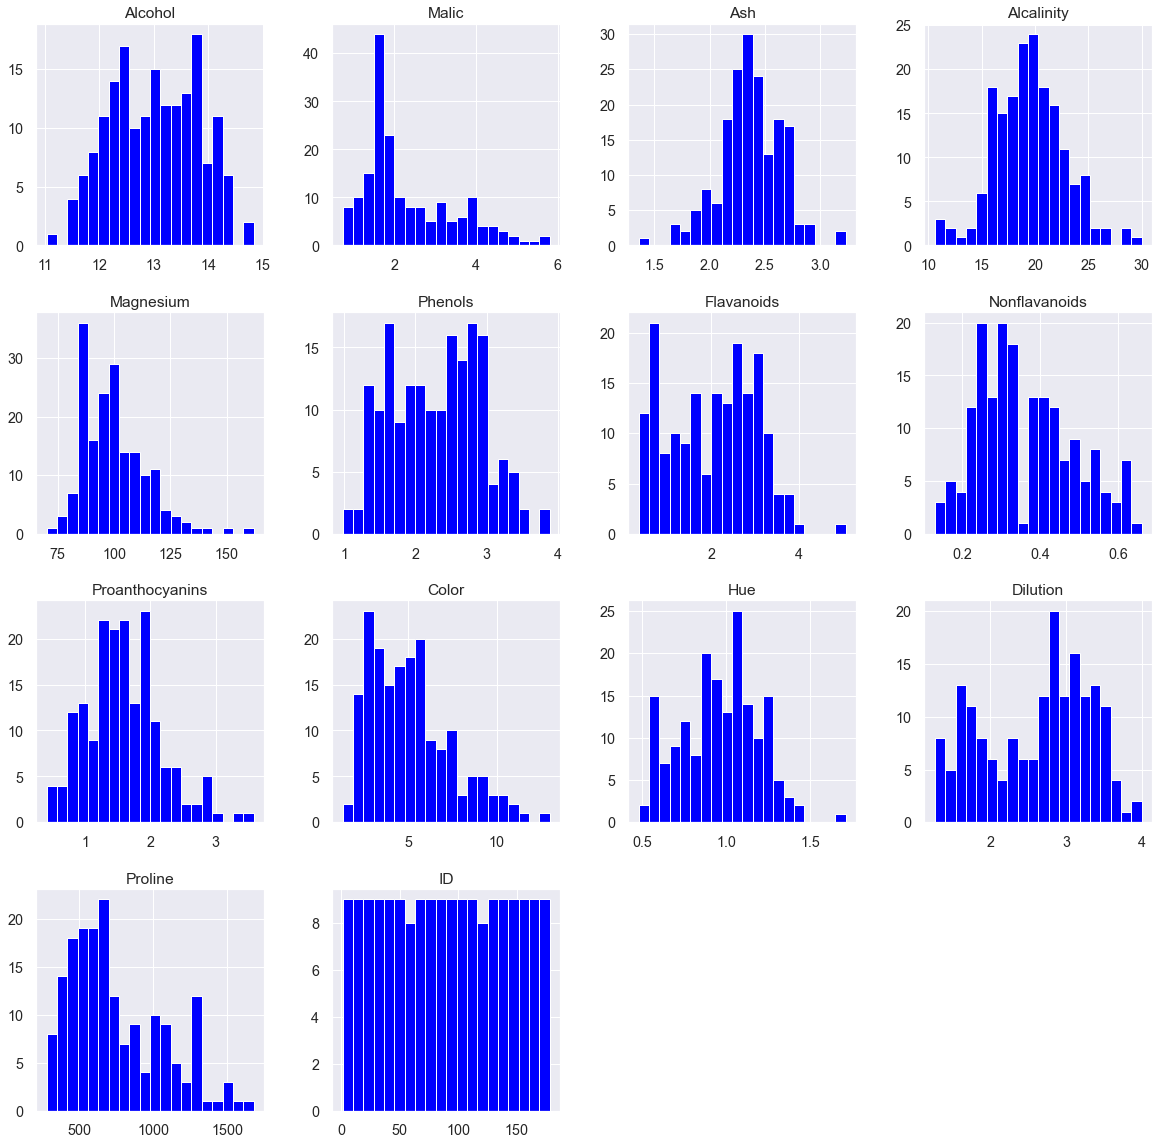

In [22]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})

wine_histogram=wine_data_df.hist(bins=20,color='blue' )

### Outliers Detection:

**We can do plot some boxplots: To strengthen our insights about data symmetry and their outliers.**

1. Box plot is a method for graphically depicting groups of numerical data through their quartiles. 
2. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
3. The whiskers extend from the edges of box to show the range of the data. 
4. The position of the whiskers is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the box. 
5. Outlier points are those past the end of the whiskers."

In [23]:
wine_data_df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

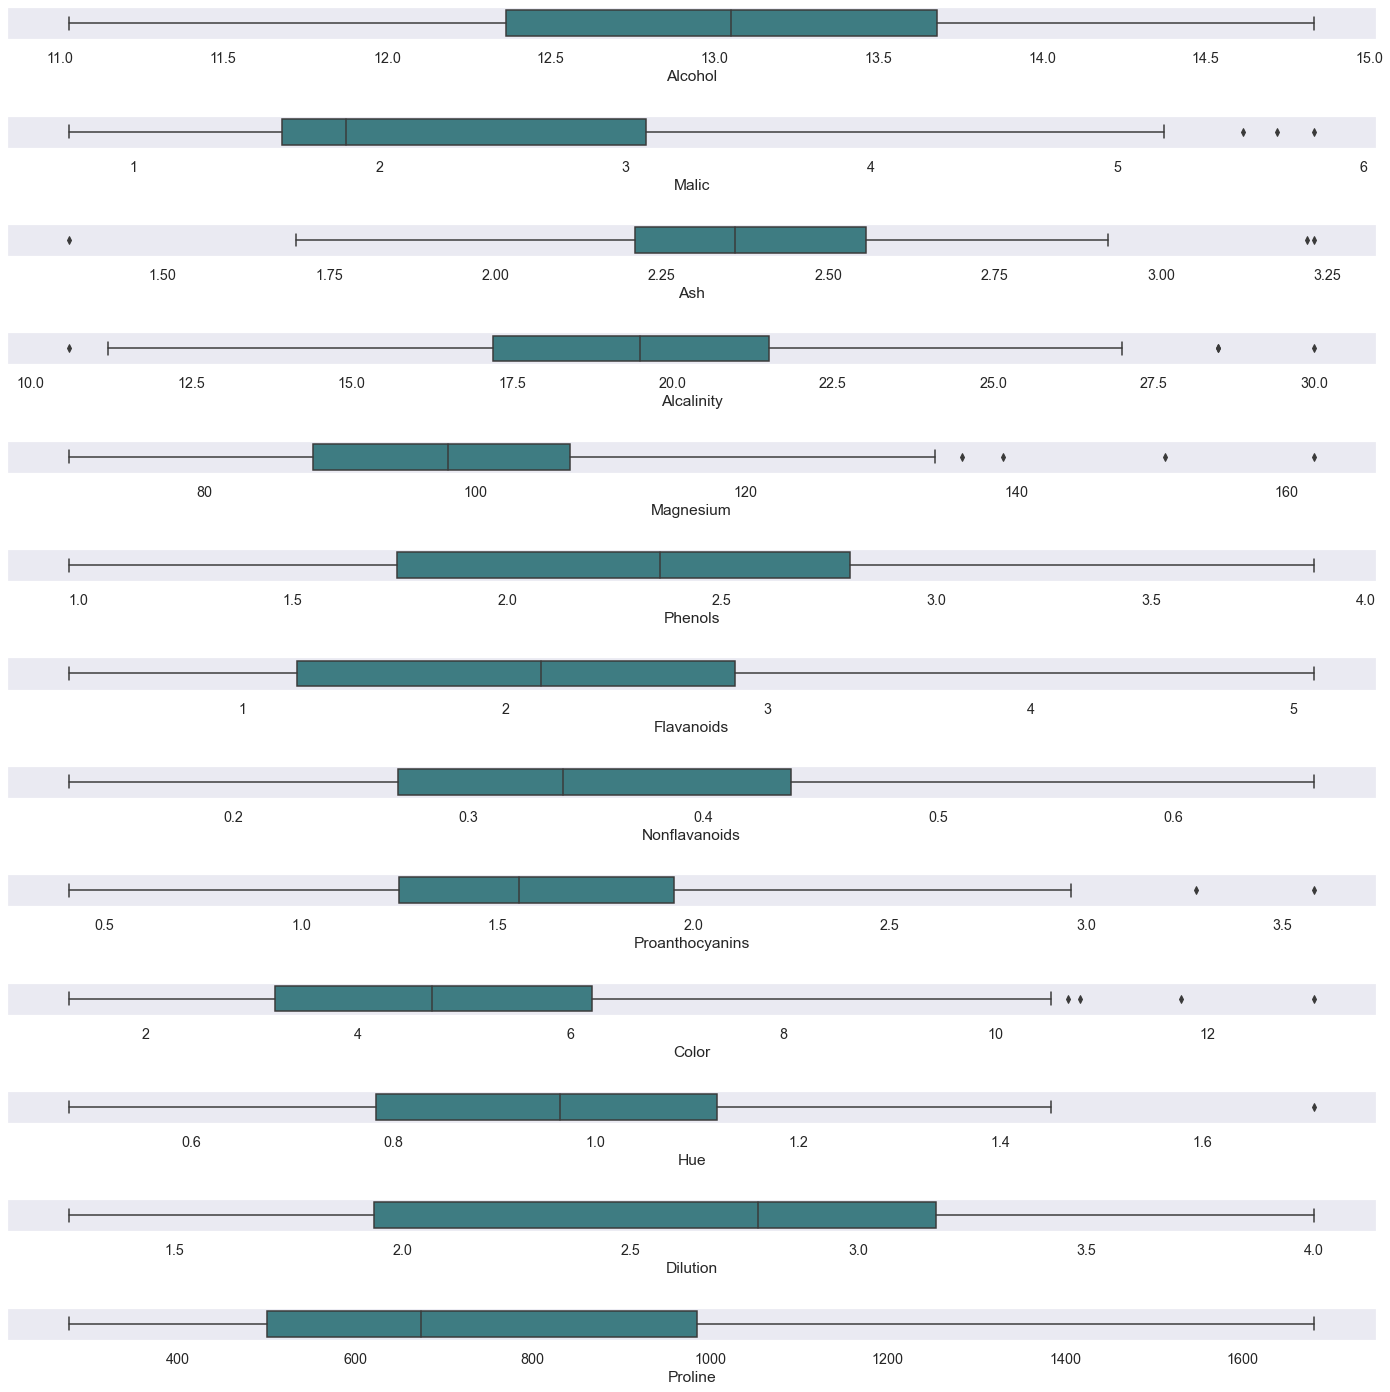

In [24]:
outliers_wine_data=wine_data_df.copy() 

fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)

sns.boxplot(x='Alcohol',data=outliers_wine_data,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outliers_wine_data,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outliers_wine_data,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outliers_wine_data,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outliers_wine_data,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outliers_wine_data,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outliers_wine_data,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outliers_wine_data,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outliers_wine_data,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outliers_wine_data,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outliers_wine_data,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outliers_wine_data,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outliers_wine_data,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)
plt.show()

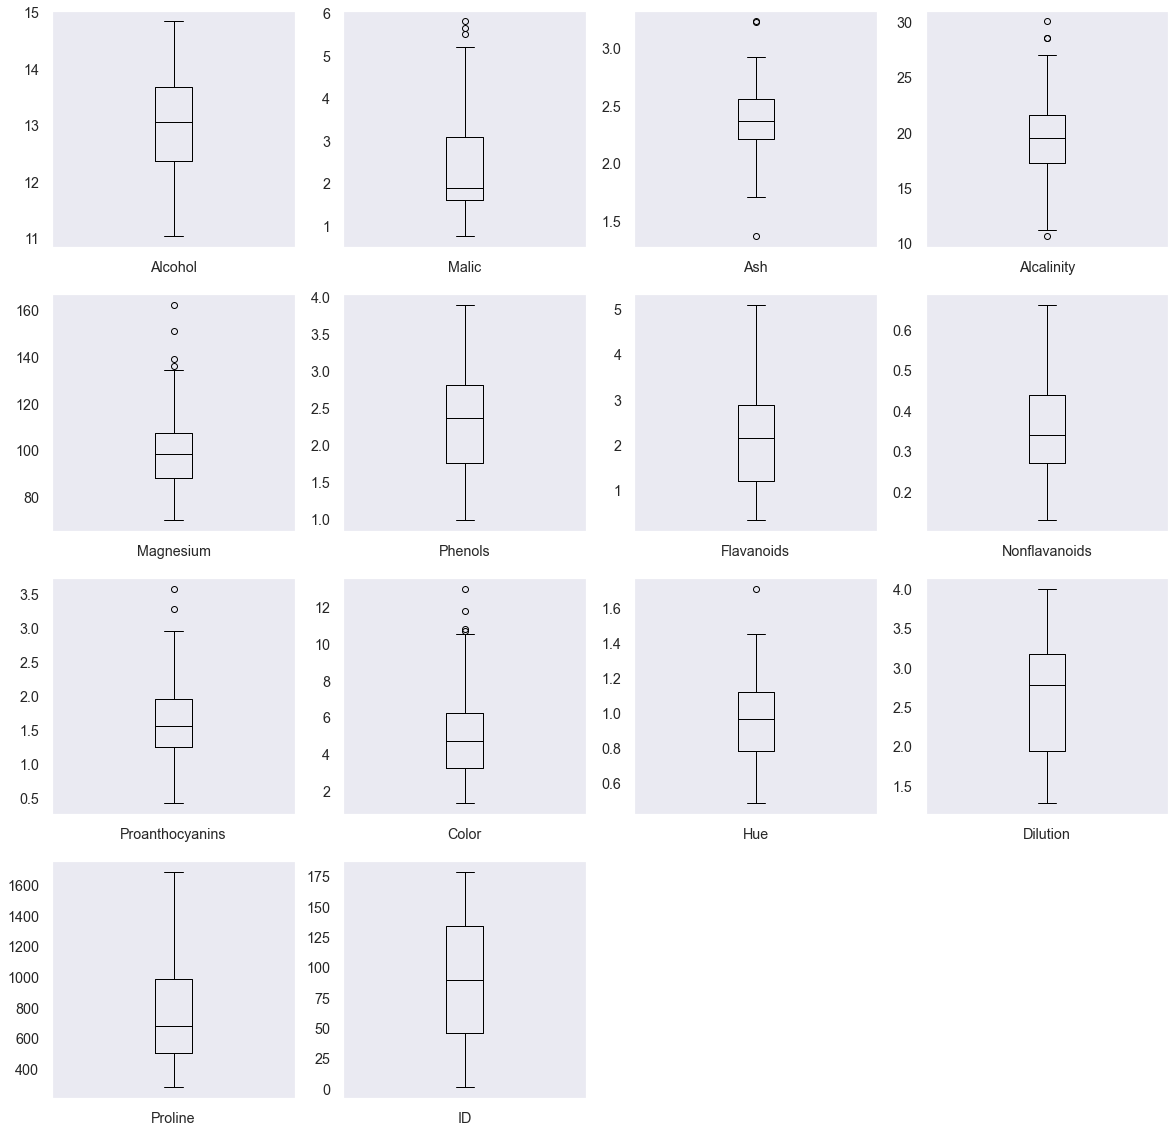

In [25]:
wine_data_df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

### Data Visualization:

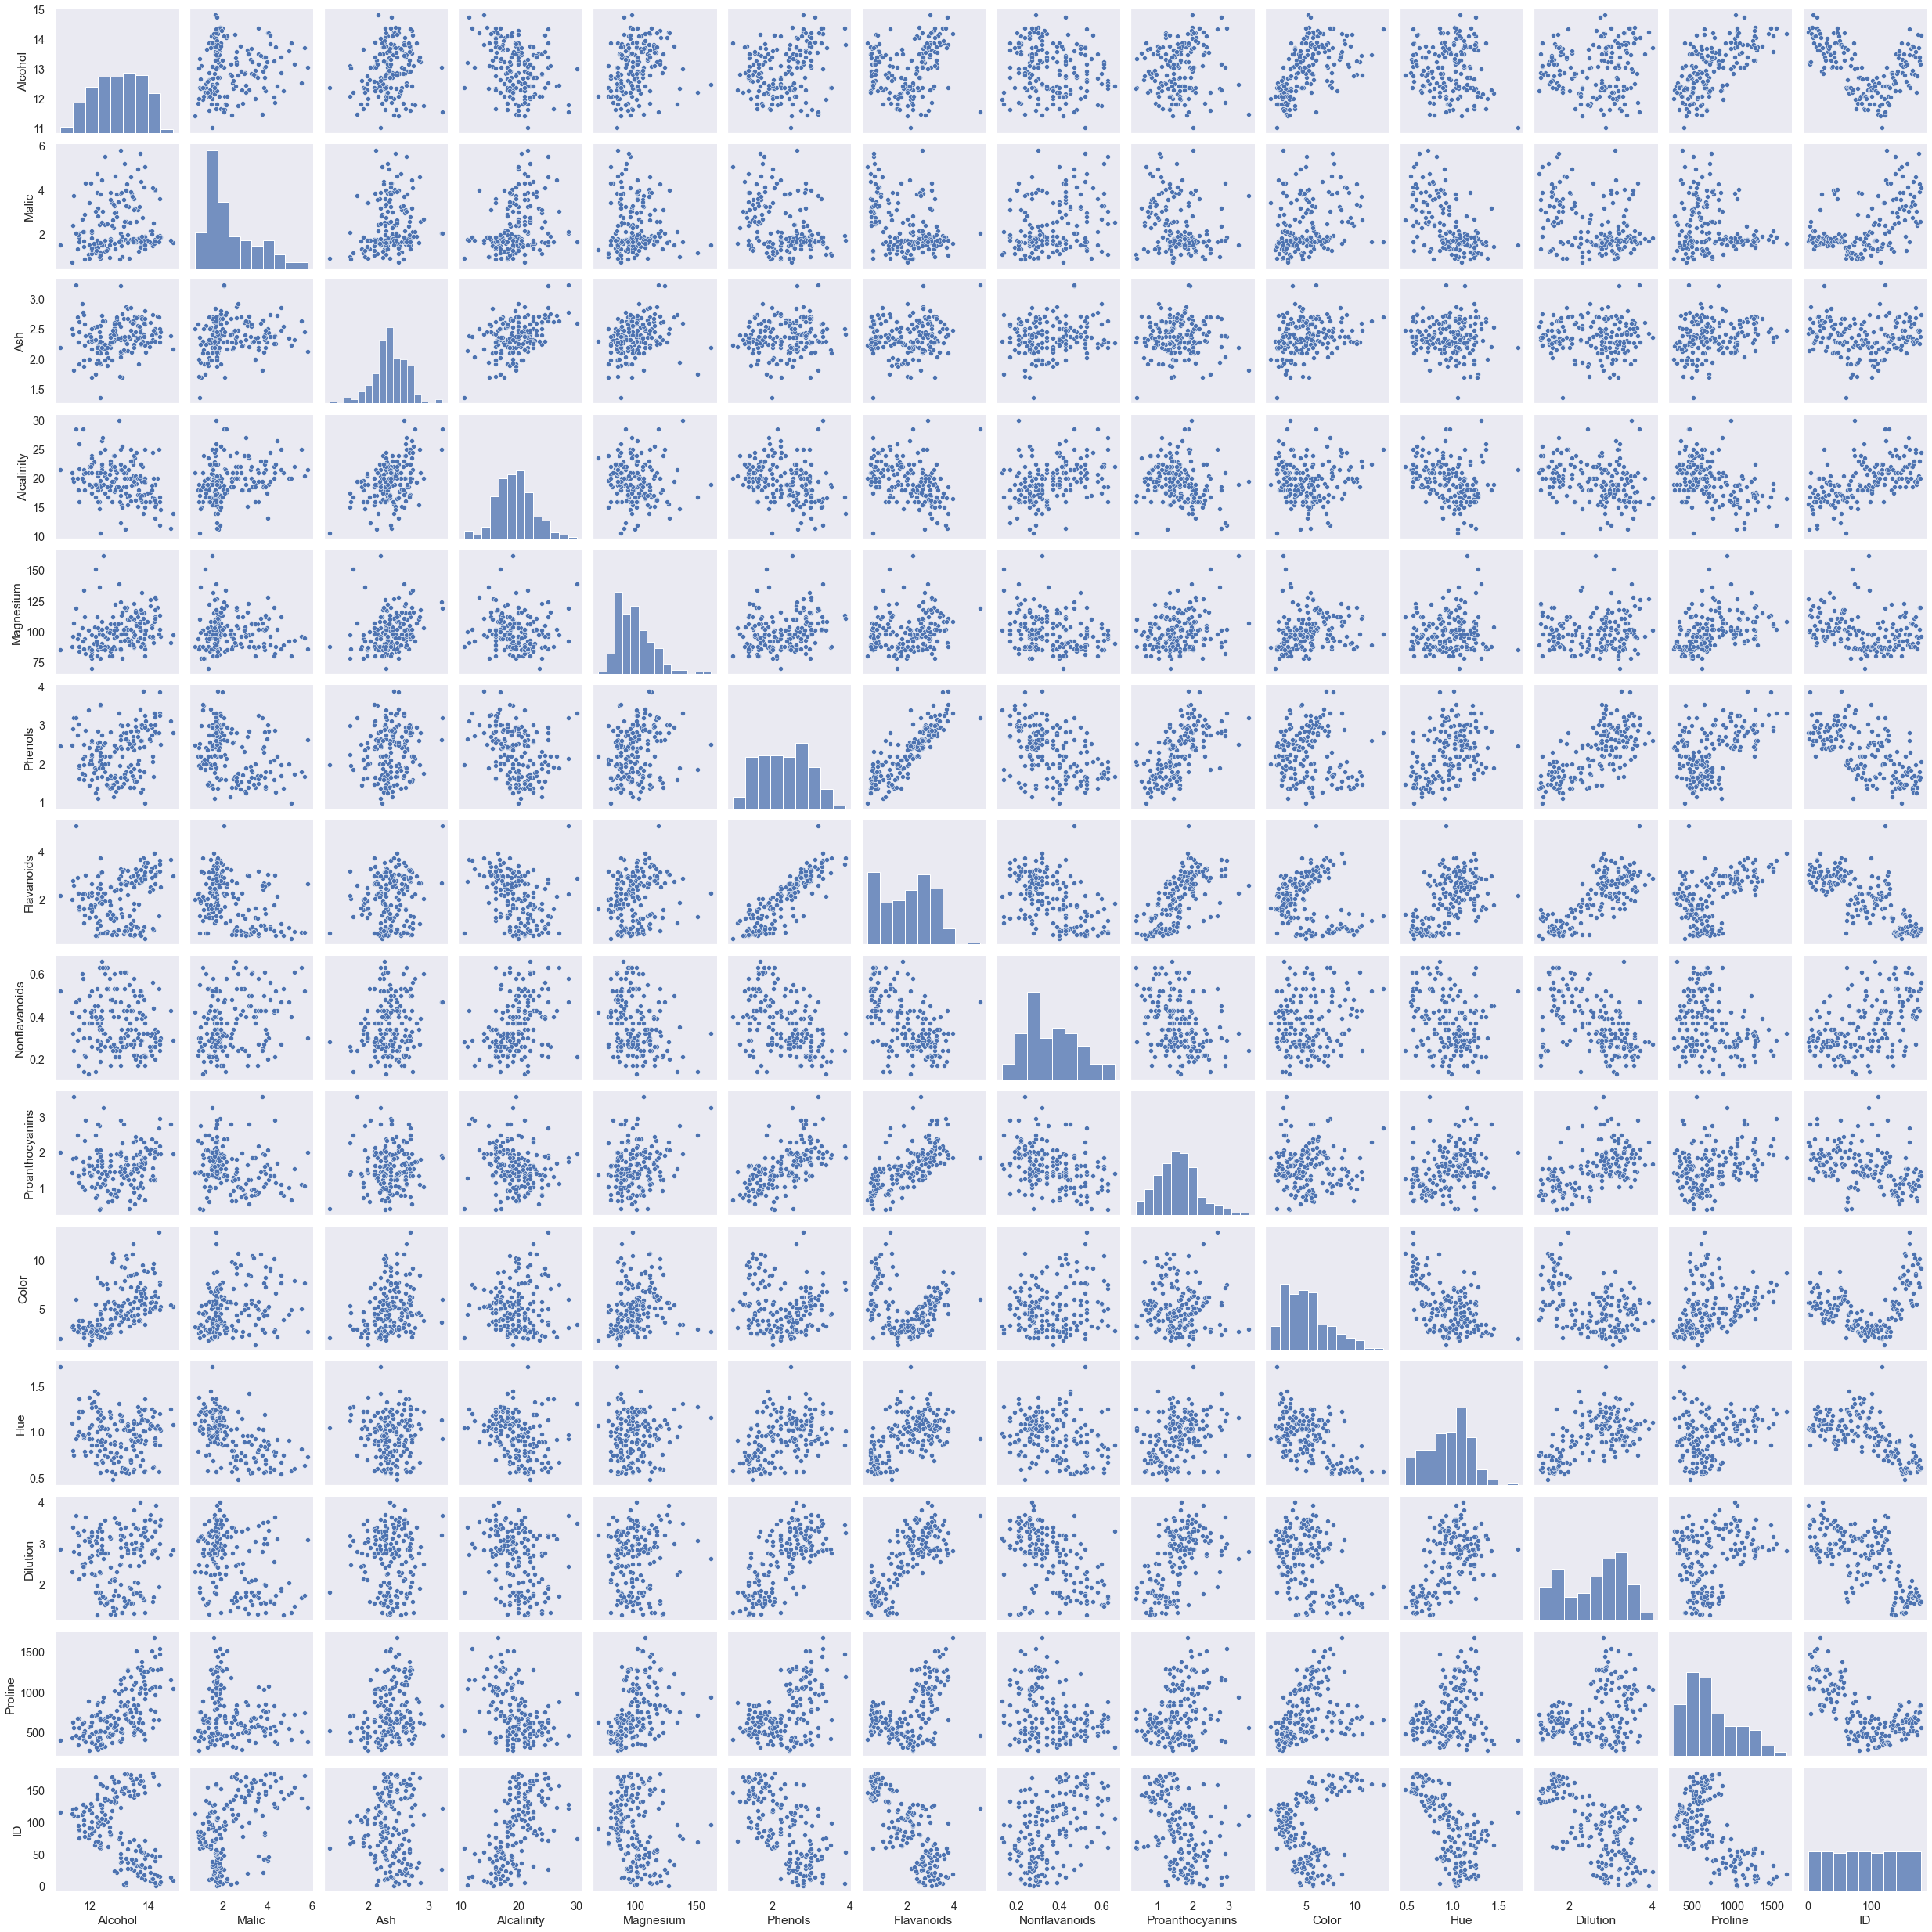

In [26]:
sns.pairplot(wine_data_df,palette="dark")
plt.show()

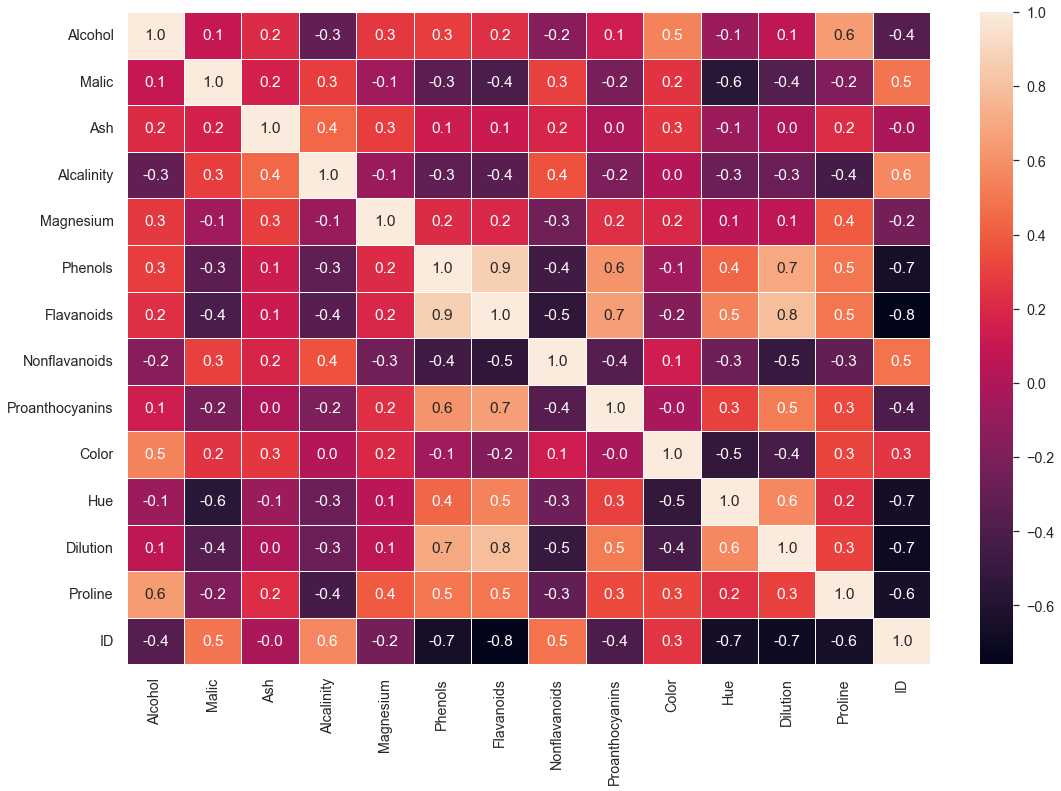

In [27]:
# Heatmap for correlation:

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(wine_data_df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

**From the above plot it has been observed that,**

1. Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins.
2. Flavanoids is positively correlated with Proanthocyanins and Dilution.
3. Dilution is positively correlated with Hue.
4. Alcohol is positively correlated with Proline.

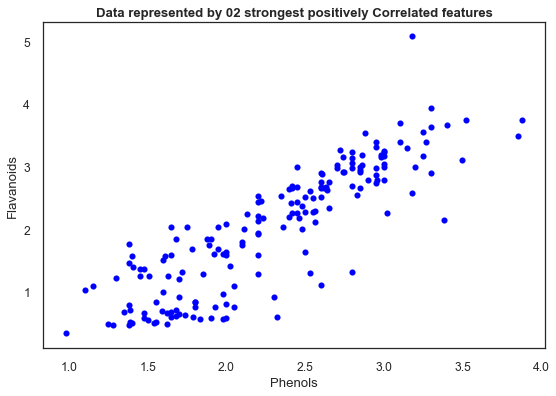

In [28]:
# Plotting frequent flying Phenols Vs Flavanoids:

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=wine_data_df['Phenols'], y=wine_data_df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by 02 strongest positively Correlated features',fontweight='bold')
plt.show()

# 4. Data Pre-processing:

### 4.1 Applying Standard Scaler on Dataset:

In [29]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(wine_data_df)
std_df.shape

(178, 14)

### 4.2 Applying MinMax Scaler on Dataset:

In [30]:
# For accuracy result comparison:
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(wine_data_df)
minmax_df.shape

(178, 14)

# 5. PCA:

**Principal Component Analysis (PCA) is dimensionality reduction technique and it was discovered (by Karl Pearson). It is very popular because it is fast and easy to implement, interpret.**

**PCA works by finding a low dimensional subspace that maximises the variance of data in that subspace and performing a linear projection. This basically means the data will be as spread out as possible, without changing relationship between data points. This allows us to find patterns or indentify clusters if any exist.**


### 5.1 PCA on Standard Scaled Dataset:

**Explained variance:**

It shows how much of variance/spread of the data is captured in each dimension i.e. How important each additional principal component is to the original data representation.

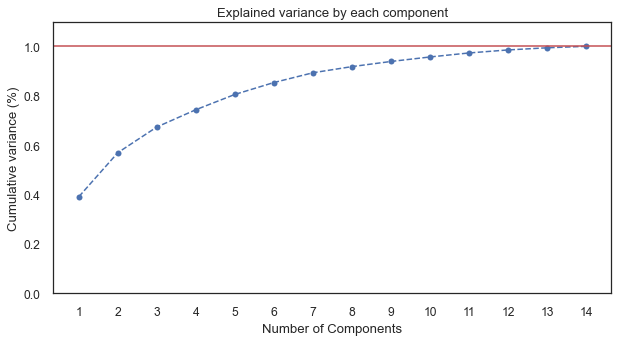

In [31]:
# PCA:

pca_var = PCA()
pca_var.fit(std_df)

# Plot:

plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics:

plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [32]:
# Amount of variance that each PCA explain:

variance_1 = pca_var.explained_variance_ratio_
variance_1

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

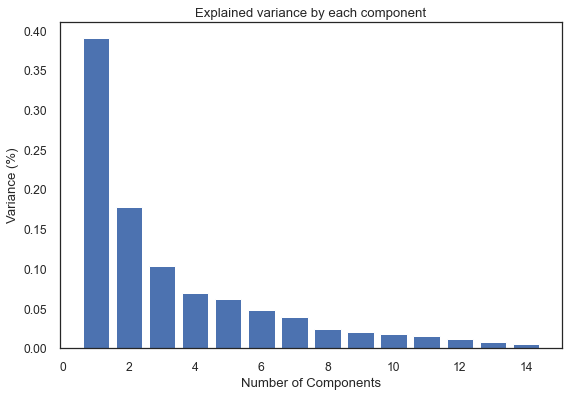

In [33]:
plt.bar(range(1, len(variance_1)+1),variance_1)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained variance by each component')

In [34]:
# Cumulative Variance:

cum_variance = np.cumsum(np.round(variance_1,decimals = 4)*100)
cum_variance

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [35]:
# PCA:

pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame:

pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview:

print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

#### PCA plot in 2D:

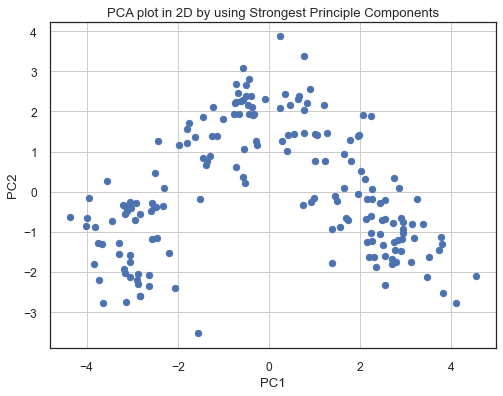

In [36]:
# Figure size:

plt.figure(figsize=(8,6))

# Scatterplot:

plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics:

plt.title('PCA plot in 2D by using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

### 5.2 PCA on MinMax Scaled Dataset:

**Explained variance:**

Explained variance shows how much of variance/spread of the data is captured in each dimension i.e. How important each additional principal component is to the original data representation.

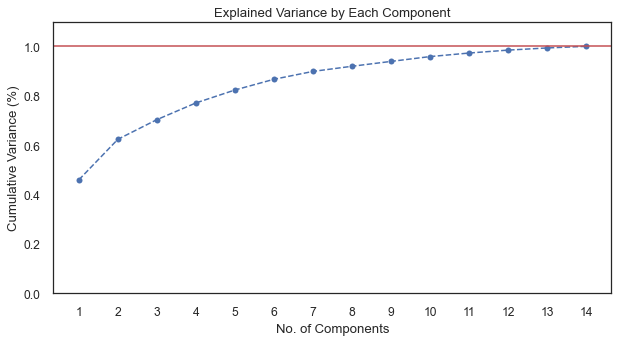

In [37]:
# PCA:

pca_var_1 = PCA()
pca_var_1.fit(minmax_df)

# Plot:

plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var_1.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics:

plt.ylim(0.0,1.1)
plt.xlabel('No. of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative Variance (%)')
plt.title('Explained Variance by Each Component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)
plt.show()

#### With 2 components, we capture > 50% of Variance and up to 3 components, we get 2/3rd of Variance.

1. For this above reason, sometimes PCA is used for the feature selection. 
2. For very big datasets with hundreds of features, it can take a long time to train models with some features not adding much value. 
3. A solution is to reduce the number of columns by using principal components from PCA. 
4. The number of components is normally chosen by looking at the explained variance graph (e.g. a minimum of 60% might be required).

In [38]:
# Amount of variance that each PCA explain:

variance_2 = pca_var_1.explained_variance_ratio_
variance_2 

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

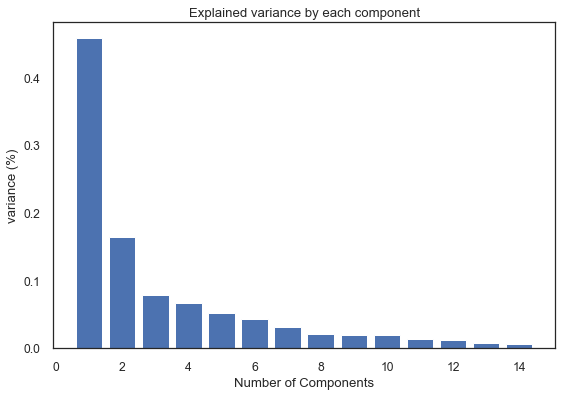

In [42]:
plt.bar(range(1, len(variance_2)+1),variance_2)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')
plt.show()

In [43]:
# Cumulative Variance:

cum_variance_1 = np.cumsum(np.round(variance_2,decimals = 4)*100)
cum_variance_1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [44]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

#### Above new columns are called Principal Components (PC's) and it gives coordinates of the data in new smaller space.

#### PCA plot in 2D:

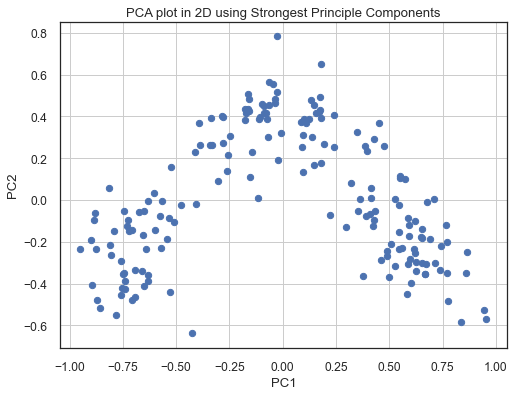

In [45]:
# Figure size:

plt.figure(figsize=(8,6))

# Scatterplot:

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics:

plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

**Conclusion:**
    
It has been noticed that how these points have no colours because we don't know what their classes are. 

We know our dataset falls naturally into 3 classes (3 types of wine). So, we assign colours by clustering the data into 3 groups using techniques such as KMeans and Hierarchical clustering.

# 5 A: KMeans Clustering

In [46]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


In [47]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


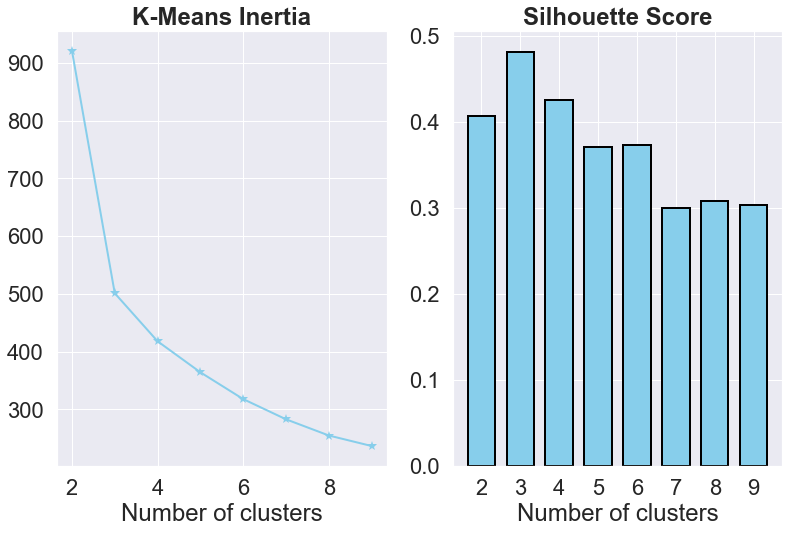

In [48]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

### There is a clearly visible "elbow".  The maximum silhouette score also indicates that Choice of 03 clusters seems to be fair...

## 5 A.1 Silhouette Score:

In [57]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]           # Here we can see the No. of clusters
clusters_inertia = []                       # Inertia of clusters
sil_scores = []                             # Silhouette scores

for n in n_clusters:
    KM_st = KMeans(n_clusters=n, init='k-means++').fit(pca_std_df)
    clusters_inertia.append(KM_st.inertia_)    # Data for Elbow method
    silhouette_avg = silhouette_score(pca_std_df, KM_st.labels_)
    sil_scores.append(silhouette_avg)          # Data for Silhouette score method

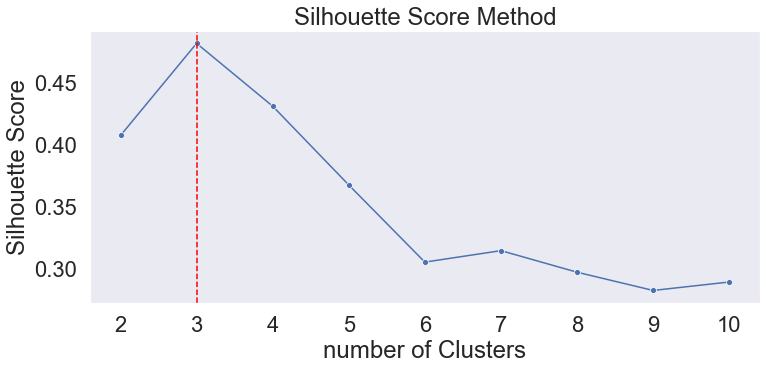

In [60]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, sil_scores, marker='o', ax=ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

#### Silhouette score method indicates that the best options would be clusters 3

Elbow Plot for Standard Scaler Data


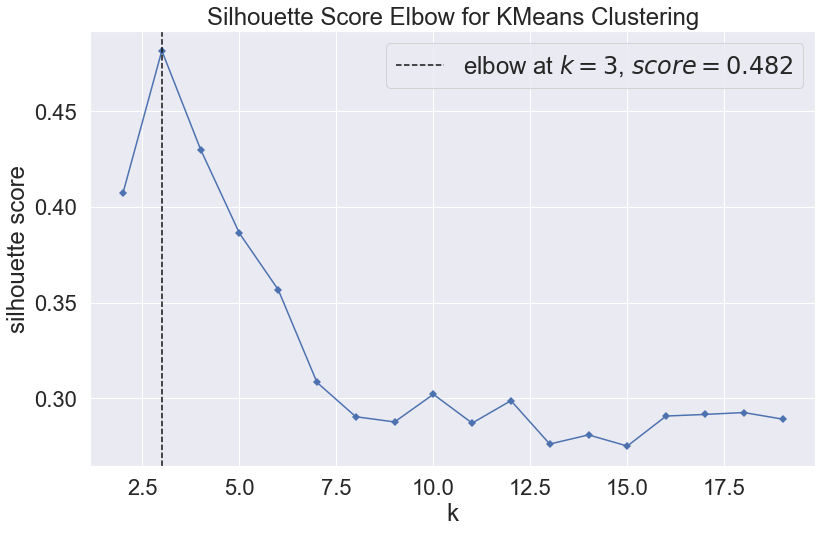

In [61]:
# Instantiate a scikit-learn K-Means model. We will have a check for two different hyperparameters value effect.

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# KElbowVisualizer with the number of clusters and metric:

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit data and visualize:

print('Elbow Plot for Standard Scaler Data')
visualizer.fit(pca_std_df)    
visualizer.show()
plt.show()

In [62]:
# Ideal number of clusters to use was 6 with elbow method.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.40748327911081
For n_clusters = 3 The average silhouette_score is : 0.48178353707242666
For n_clusters = 4 The average silhouette_score is : 0.43109240818432953
For n_clusters = 5 The average silhouette_score is : 0.41489679453806727
For n_clusters = 6 The average silhouette_score is : 0.3837227147675391
For n_clusters = 7 The average silhouette_score is : 0.30996557235673206
For n_clusters = 8 The average silhouette_score is : 0.28862996728423584
For n_clusters = 9 The average silhouette_score is : 0.2957346845976878


For n_clusters = 2 The average silhouette_score is : 0.40748327911081
For n_clusters = 3 The average silhouette_score is : 0.48178353707242666
For n_clusters = 4 The average silhouette_score is : 0.43109240818432953
For n_clusters = 5 The average silhouette_score is : 0.41489679453806727
For n_clusters = 6 The average silhouette_score is : 0.3837227147675391
For n_clusters = 7 The average silhouette_score is : 0.30996557235673206
For n_clusters = 8 The average silhouette_score is : 0.28862996728423584
For n_clusters = 9 The average silhouette_score is : 0.2957346845976878


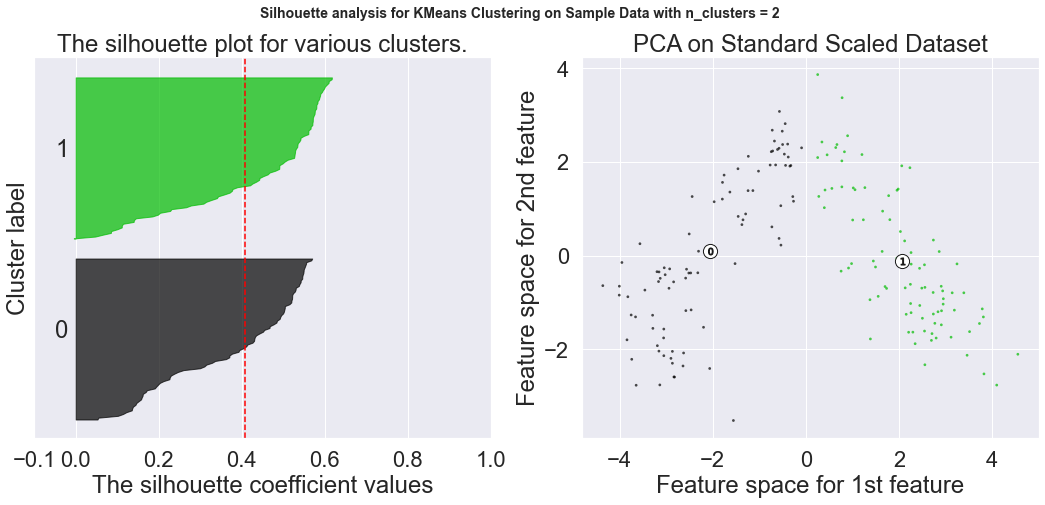

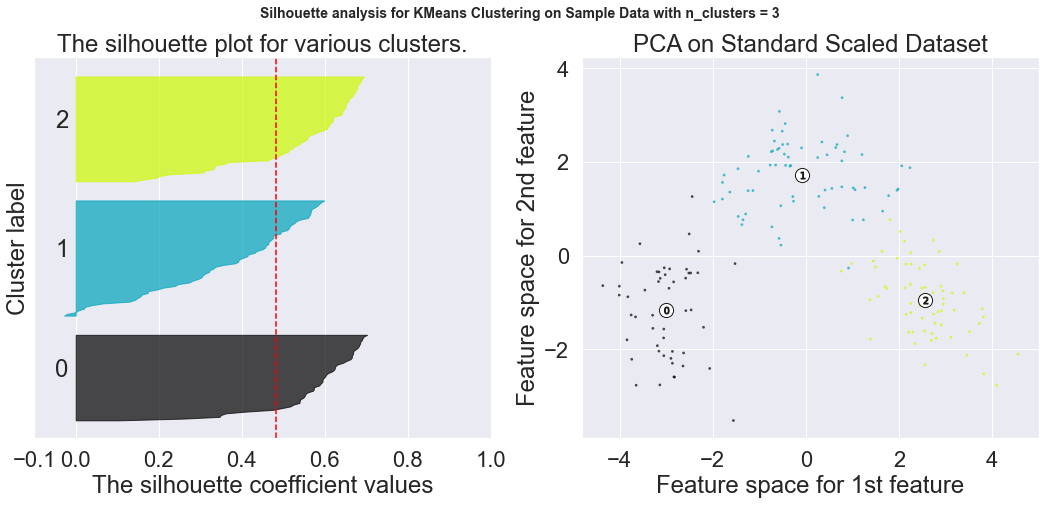

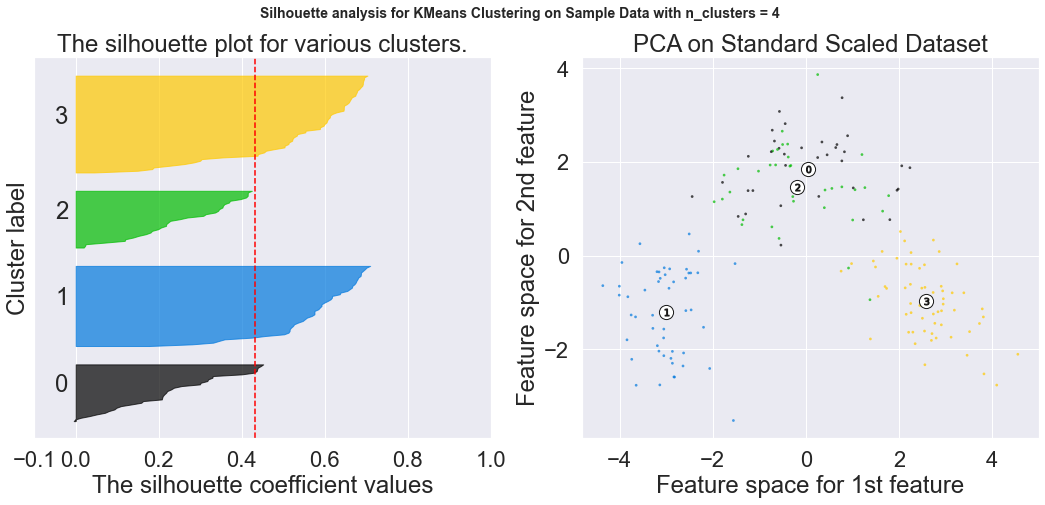

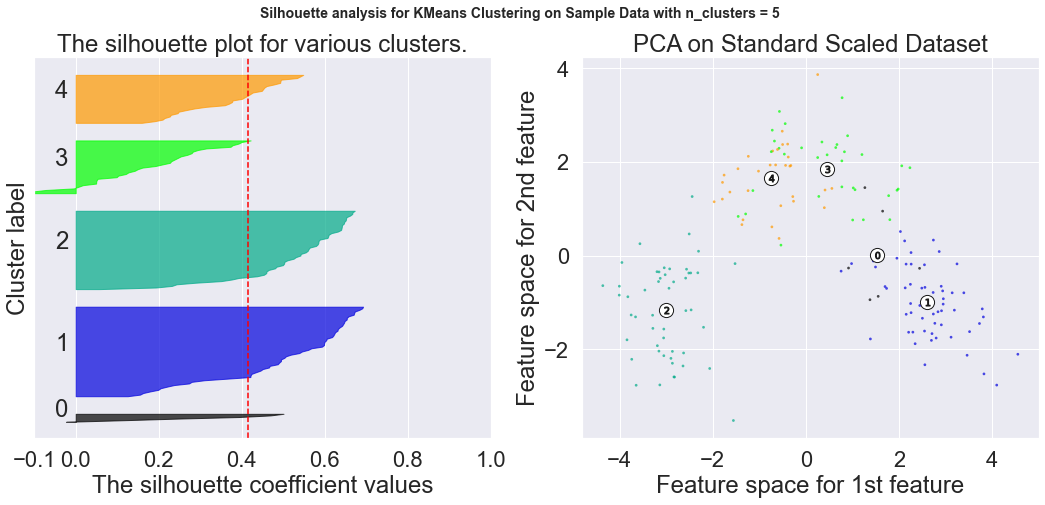

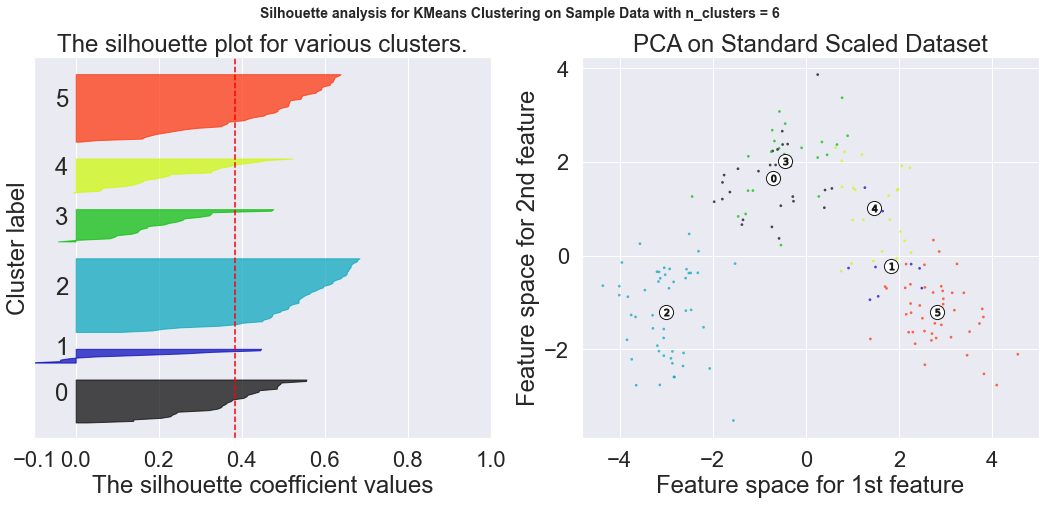

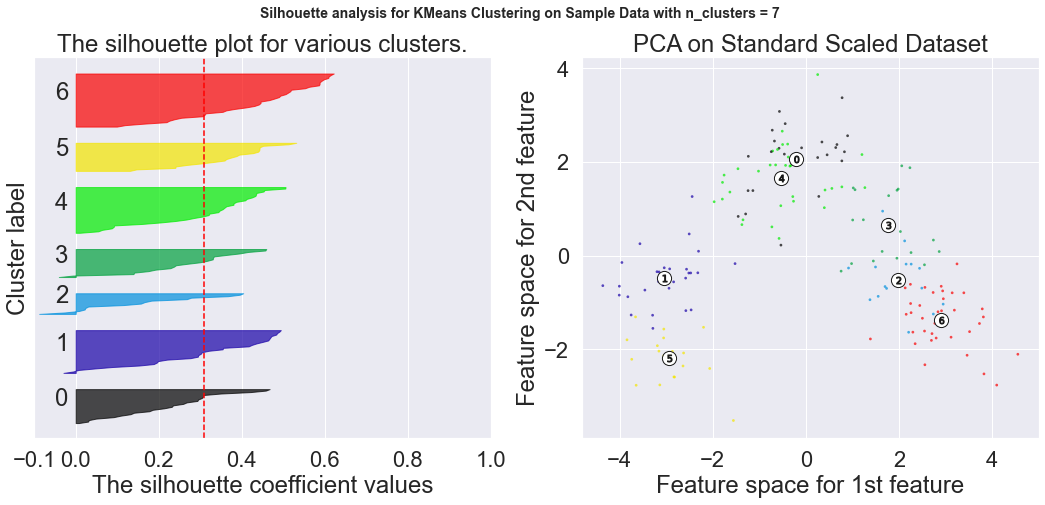

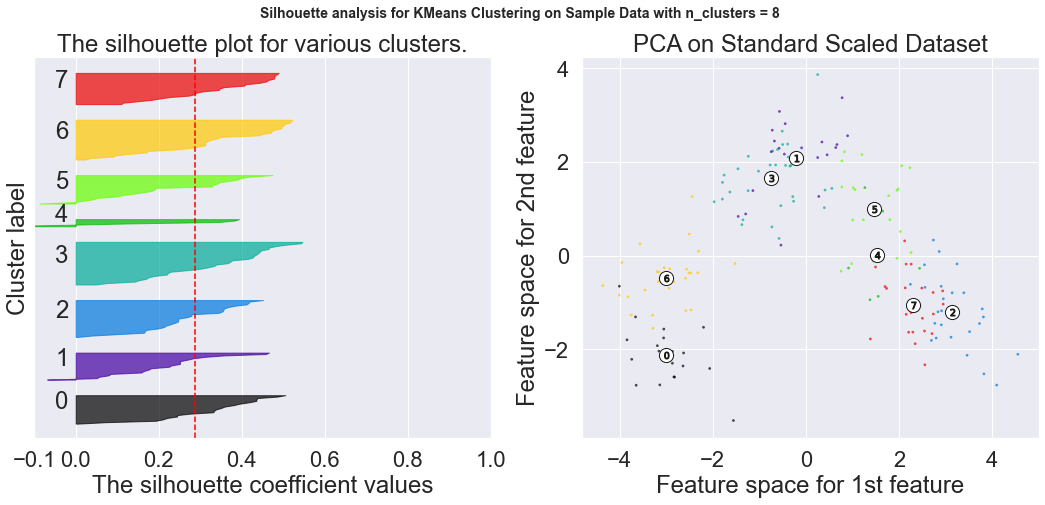

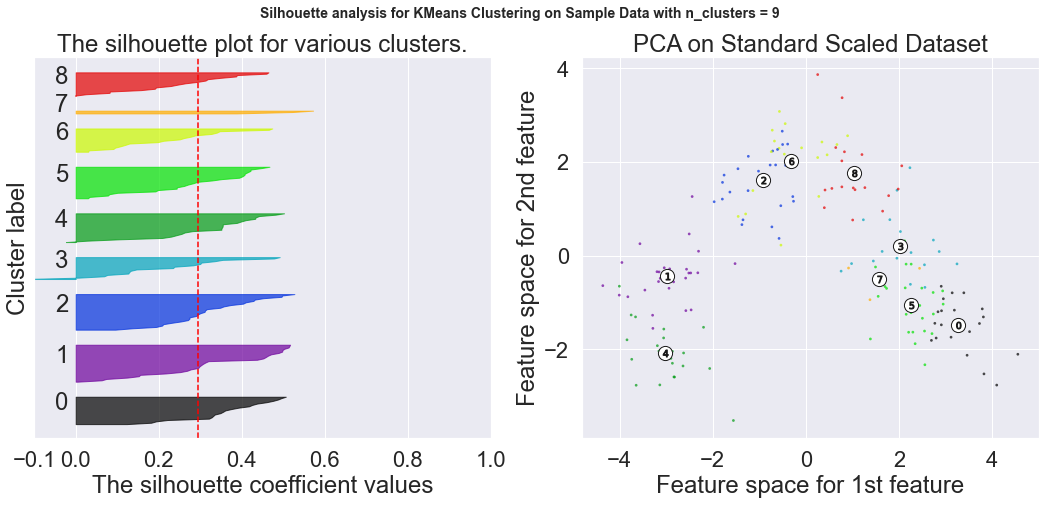

In [64]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is silhouette plot
    # Silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    
    ax1.set_xlim([-0.1, 1])
    
    # (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters to demarcate them clearly.
    
    ax1.set_ylim([0, len(pca_std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    cluster_er = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = cluster_er.fit_predict(pca_std_df)

    # Silhouette_score gives the average value for all samples.
    # This gives a perspective into the density and separation of the formed clusters
    
    silhouette_avg = sil(pca_std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample:
    sample_silhouette_values = silhouette_samples(pca_std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Clear the yaxis labels / ticks
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster_er.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on Standard Scaled Dataset")
    ax2.set_xlabel("Feature space for 1st feature")
    ax2.set_ylabel("Feature space for 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans Clustering on Sample Data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Conclusion:**

According to Silhouette Score of Standardized Data, ideal No. of clusters is 3 with score higher than other options of 0.48

## 5 A.2 Build KMeans Cluster algo. using K=3 & PCA on Standard Scaler Applied Dataset

In [66]:
# Good number of cluster found is = 3
# Model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [67]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [68]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [69]:
model_kmeans.cluster_centers_ # cluster centres associated with each lables

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [70]:
model_kmeans.inertia_

501.17482400537773

In [72]:
#Assign clusters to the data set

wine_data['Kmeans_label'] = model_kmeans.labels_

In [73]:
wine_data.groupby('Kmeans_label').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000  98.640000    
1             2.000000  12.246418  1.891642  2.242985  20.140299  93.238806    
2             1.032787  13.711475  1.997049  2.453770  17.281967  107.786885   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200  0.807000   0.45040       1.156400        7.264400   
1             2.258209  2.085672   0.36194       1.612836        3.059701   
2             2.842131  2.969180   0.28918       1.922951        5.444590   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800  622.440000   152.380000  
1             1.059493  2.798507  508.597015   95.104478   
2             1.067705  3.154754  1110.639344  31.803279

In [78]:
wine_data[wine_data['Kmeans_label']==0]
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1  1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2  1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3  1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4  1     13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  
0  2             
1  2             
2  2             
3  2             
4  2

In [75]:
from yellowbrick.cluster import SilhouetteVisualizer

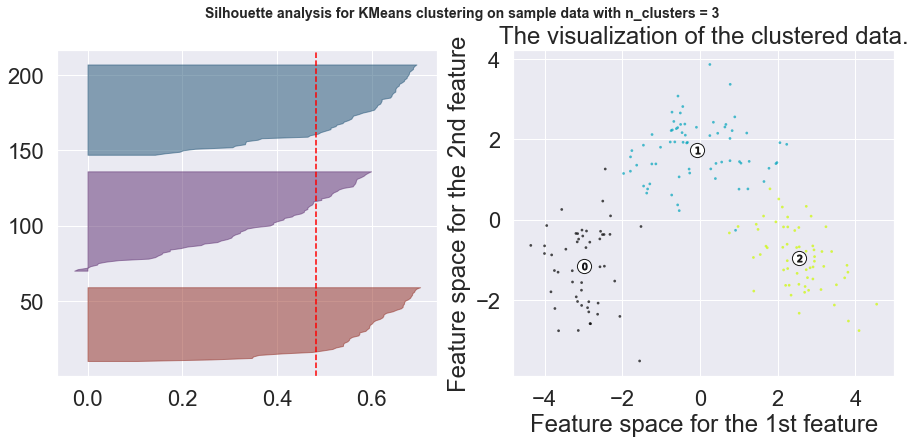

In [79]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_df)

# 2nd Plot showing actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3)                          # 3 is number of clusters
ax2.scatter(pca_std_df.iloc[:, 0], pca_std_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling clusters
centers1 = model_kmeans.cluster_centers_

# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

#sil_visualizer1.show()

plt.show()

## 5 A.3 Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data

In [80]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:12<00:00,  1.54s/it]


In [81]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    silhouette[i] = sil(pca_minmax_df, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:12<00:00,  1.55s/it]


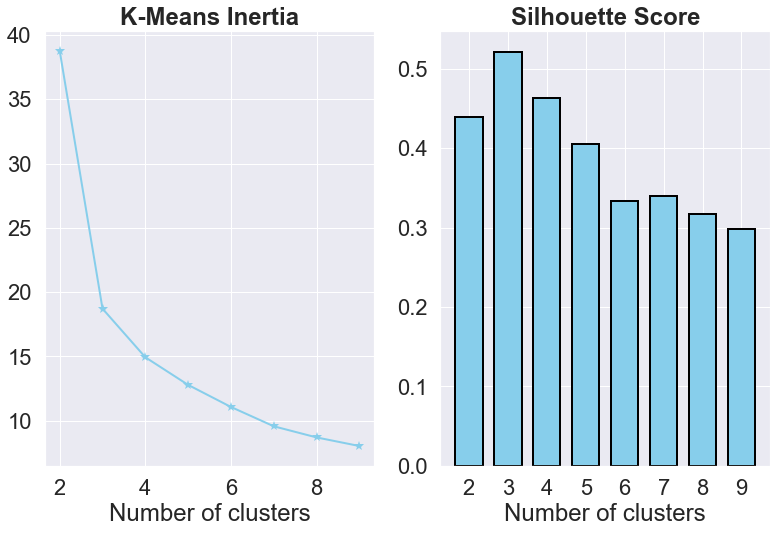

In [82]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

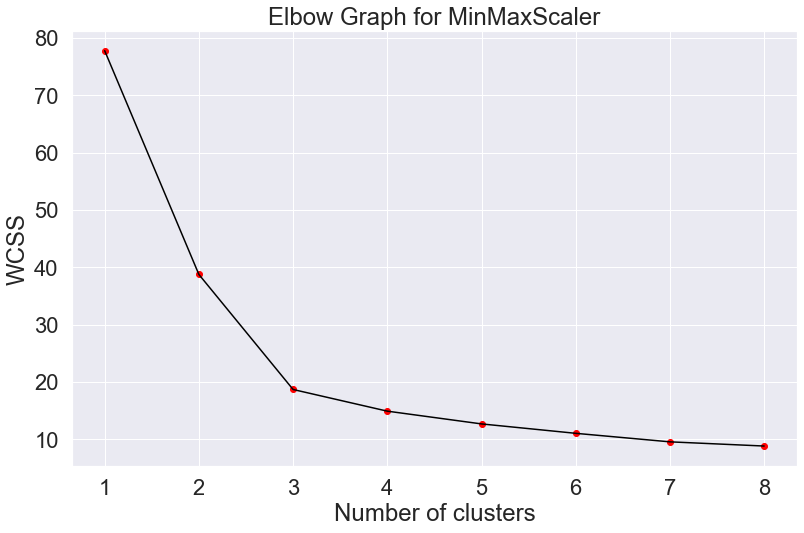

In [83]:
wcss=[]

for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K-values range Vs WCSS to get an Elbow graph for choosing K (No. of clusters):

plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

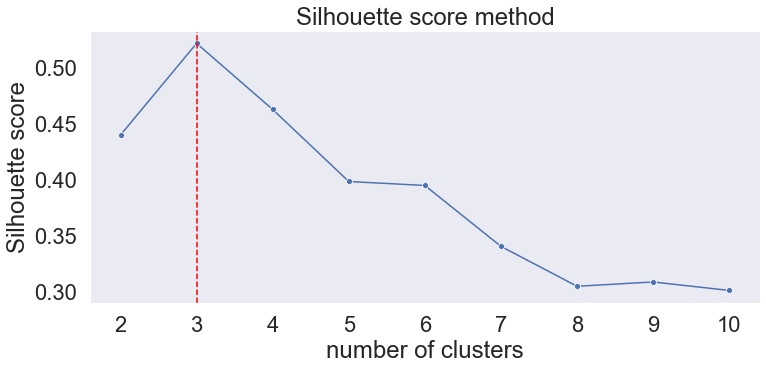

In [84]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10] # No. of clusters
clusters_inertia = []             # Inertia of clusters
s_scores = []                     # Silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_minmax_df)
    clusters_inertia.append(KM_est.inertia_)        # Data for elbow method
    silhouette_avg = silhouette_score(pca_minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg)                 # Data for Silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


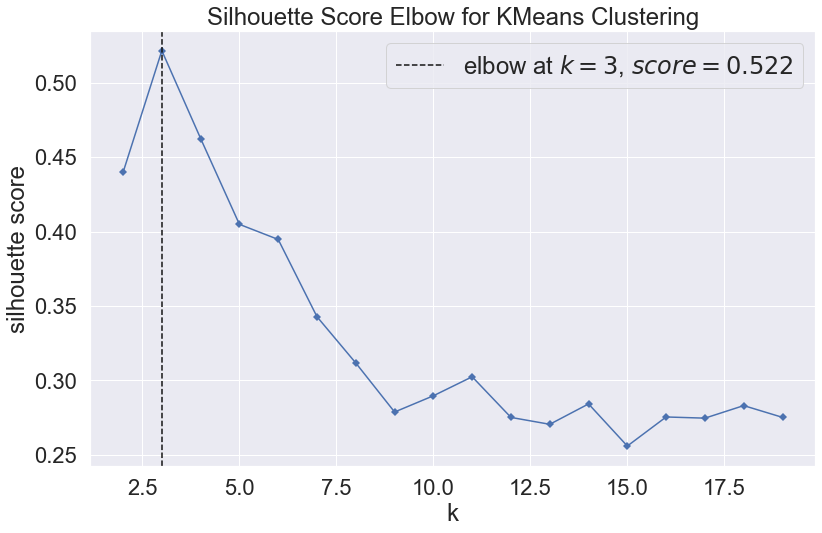

In [85]:
# Instantiate a scikit-learn K-Means model. We will check for two different Hyperparameters value effect.

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# KElbowVisualizer with number of clusters and metric

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit data and visualize:

print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_minmax_df)    
visualizer.show()
plt.show()

In [86]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data:

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df)
    sil_score1= sil(pca_minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4397504158913886
For n_clusters = 3 The average silhouette_score is : 0.5215335527289146
For n_clusters = 4 The average silhouette_score is : 0.4625268425813934
For n_clusters = 5 The average silhouette_score is : 0.39825936654852967
For n_clusters = 6 The average silhouette_score is : 0.3947108989572142
For n_clusters = 7 The average silhouette_score is : 0.3289857388561523
For n_clusters = 8 The average silhouette_score is : 0.3117232226913738
For n_clusters = 9 The average silhouette_score is : 0.29974630784109535


For n_clusters = 2 The average silhouette_score is : 0.4397504158913886
For n_clusters = 3 The average silhouette_score is : 0.5215335527289146
For n_clusters = 4 The average silhouette_score is : 0.4625268425813934
For n_clusters = 5 The average silhouette_score is : 0.4048633645906421
For n_clusters = 6 The average silhouette_score is : 0.3947108989572142
For n_clusters = 7 The average silhouette_score is : 0.34279238396007683
For n_clusters = 8 The average silhouette_score is : 0.3117232226913738
For n_clusters = 9 The average silhouette_score is : 0.27878289109726073


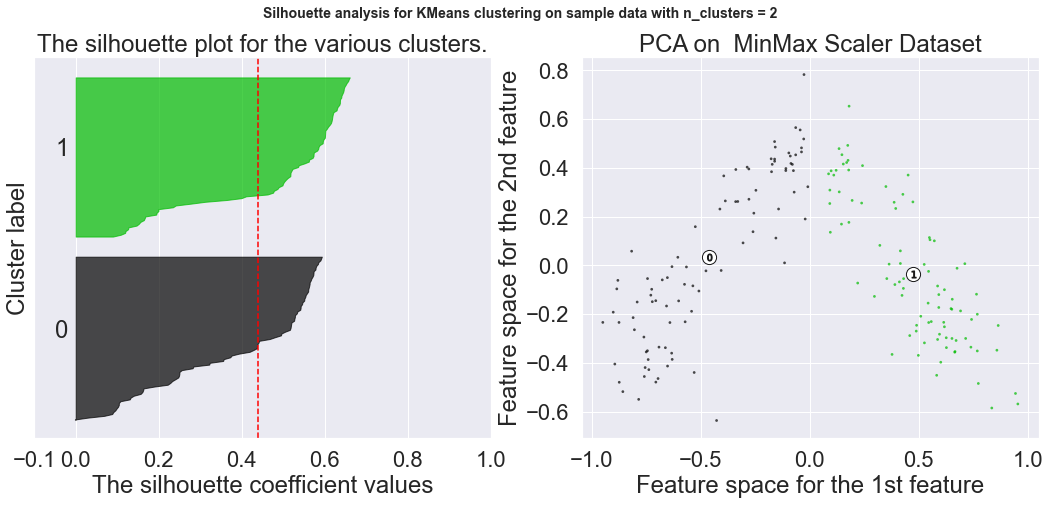

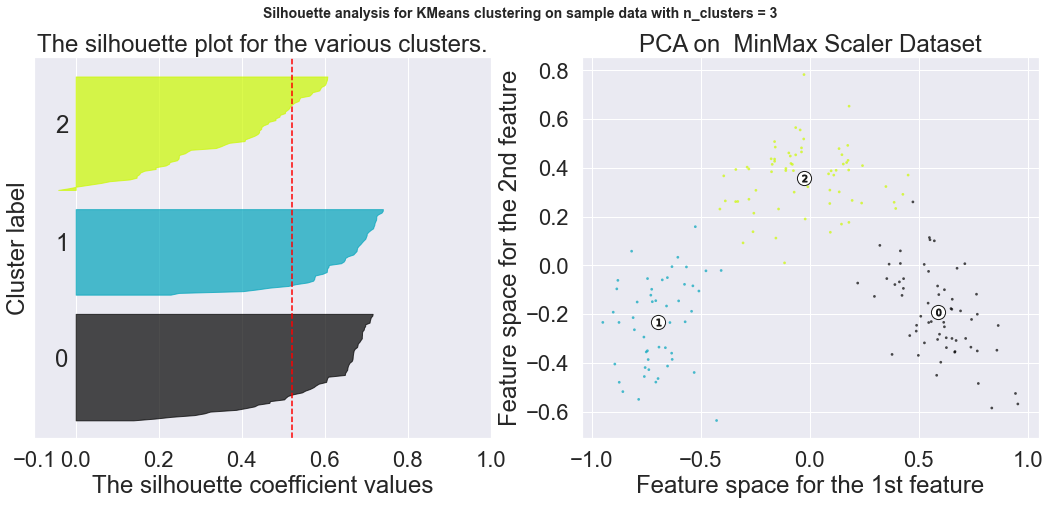

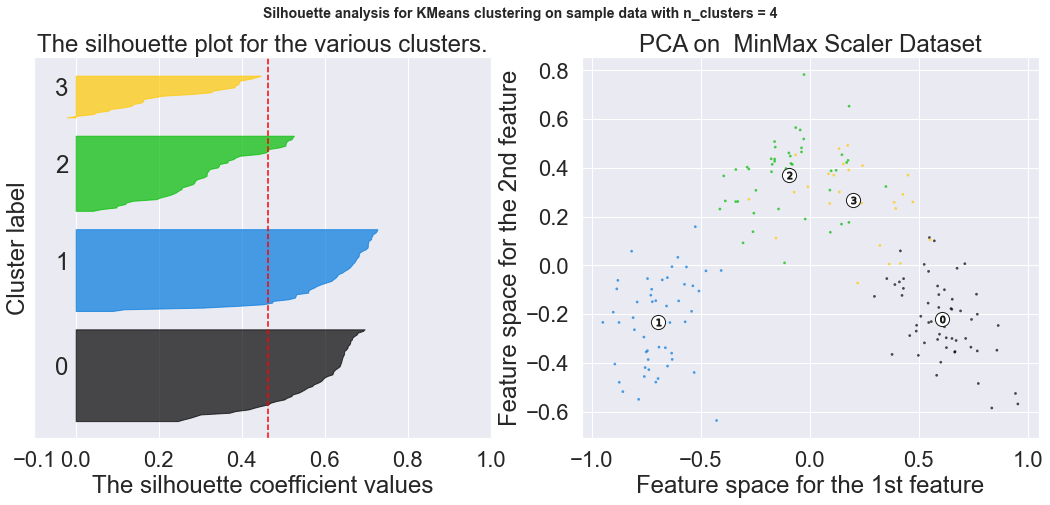

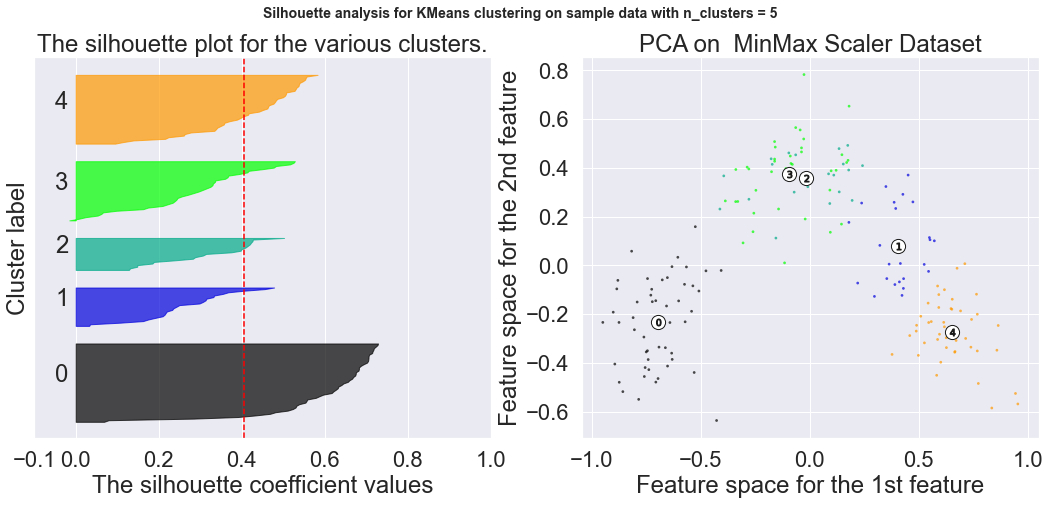

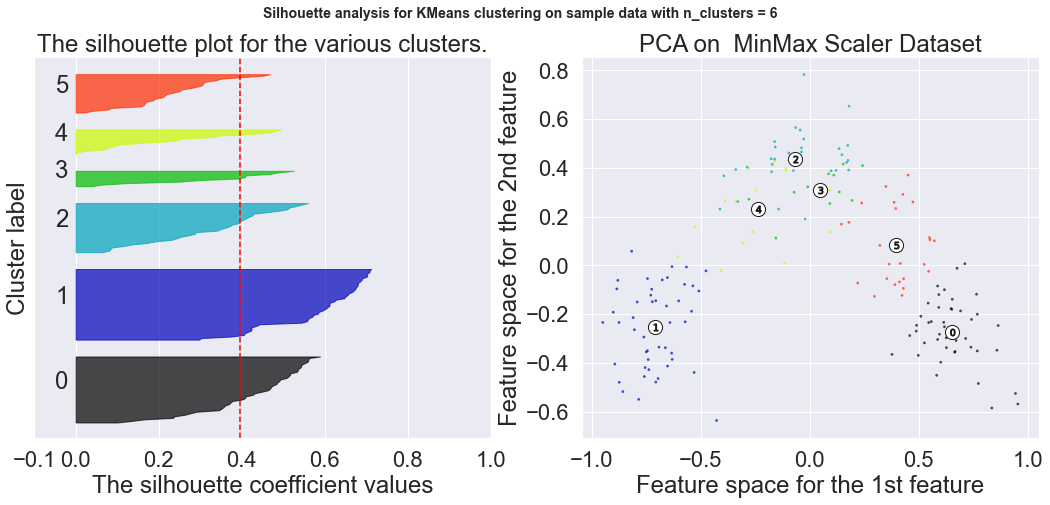

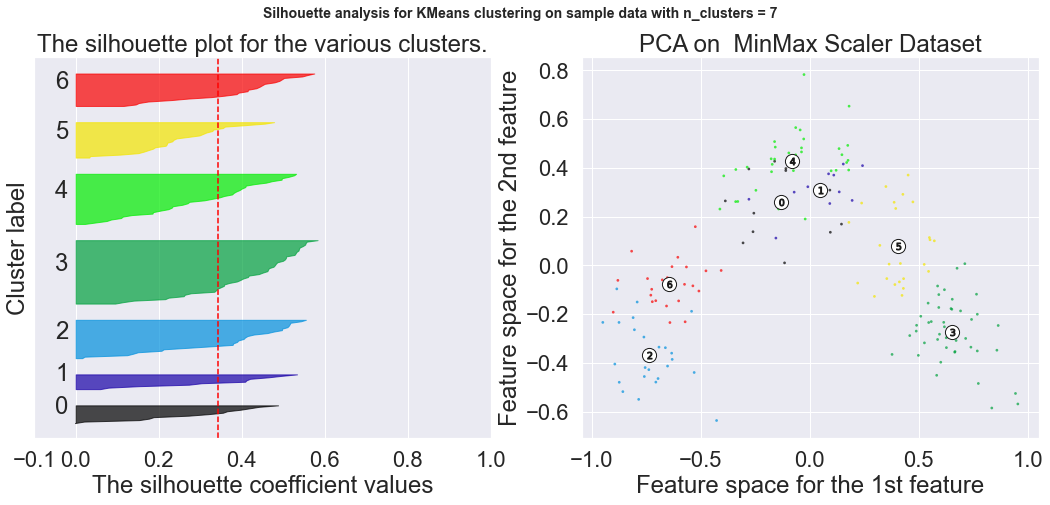

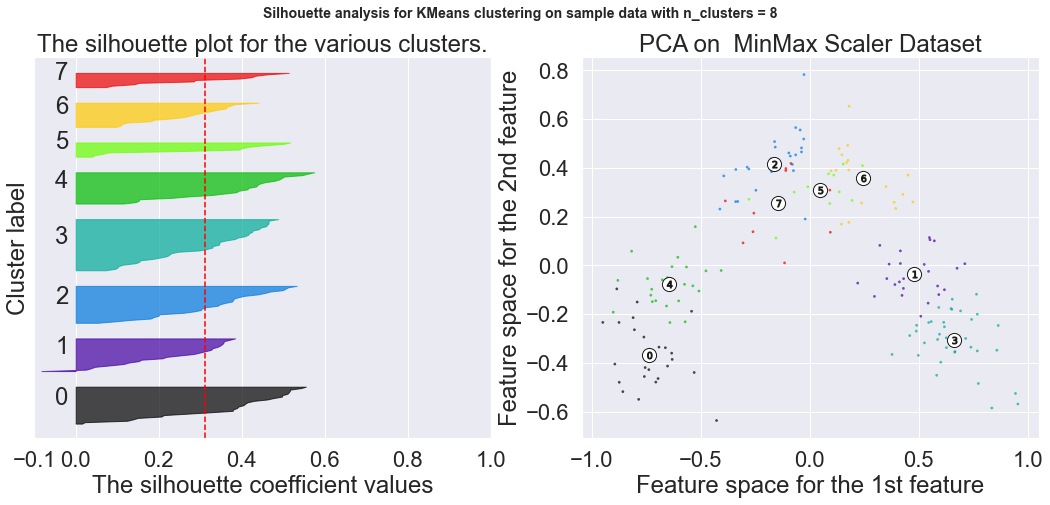

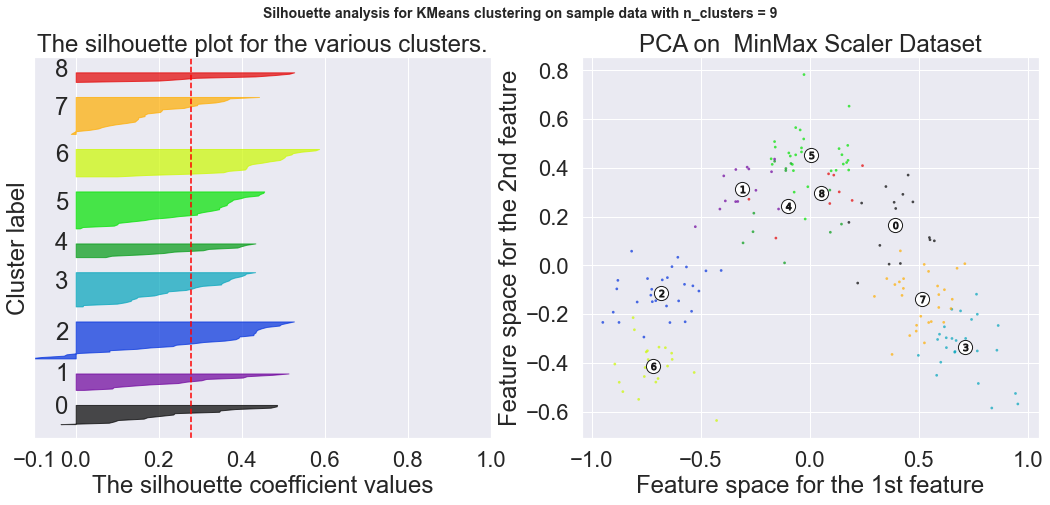

In [87]:
range_n_clusters = [2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    
# Create subplot with 1 row and 2 columns:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

# 1st subplot is Silhouette plot.
# Silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    
    ax1.set_xlim([-0.1, 1])
    
# (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters.
    
    ax1.set_ylim([0, len(pca_minmax_df) + (n_clusters + 1) * 10])

# Initialize clusterer with n_clusters value and random generator seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_minmax_df)

# Silhouette_score gives average value for all samples. 
# This gives a perspective into density and separation of formed clusters:

    silhouette_avg = sil(pca_minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Compute Silhouette scores for each sample:
    
    sample_silhouette_values = silhouette_samples(pca_minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
# Aggregate Silhouette scores for samples belonging to cluster i, and sort them:

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

# Label Silhouette plots with their cluster numbers at middle

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

# Compute new y_lower for next plot:

        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])             # Clear the yaxis labels / ticks
    
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
    centers = clusterer.cluster_centers_
    
# Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on  MinMax Scaler Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Conclusion:**

According to Silhouette score of PCA on MinMaxScaler Applied data, ideal No. of clusters is 3 with score higher than other options, of 0.52, but if you notice the No. of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no overlapping in cluster segregation than the consecutive rest.

If we check silhouette score with PCA on Normalize data kmeans model 0.52 > 0.48 than of PCA on Standard Scaler Dataset.

Best score always close to +1.

## 5 A.4 Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset:

In [88]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [89]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [90]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [91]:
model_kmeans.cluster_centers_

array([[-0.69579292, -0.23298991,  0.00190367],
       [-0.02383121,  0.35770859,  0.01239953],
       [ 0.58649203, -0.19289148, -0.01473472]])

In [92]:
model_kmeans.inertia_

18.717061925694484

In [93]:
#Assign clusters to the data set

wine_data['Kmeans_label'] = model_kmeans.labels_

In [94]:
# Group data by Clusters (K=3)

wine_data.groupby('Kmeans_label').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000  98.640000    
1             2.000000  12.233333  1.905000  2.251212  20.218182  93.469697    
2             1.048387  13.701774  1.981129  2.441613  17.245161  107.306452   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200  0.807000   0.450400      1.156400        7.264400   
1             2.247273  2.069091   0.363485      1.602727        3.025758   
2             2.844355  2.972581   0.288710      1.928710        5.442258   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800  622.440000   152.380000  
1             1.058576  2.792727  508.696970   95.530303   
2             1.068548  3.155161  1100.822581  32.370968

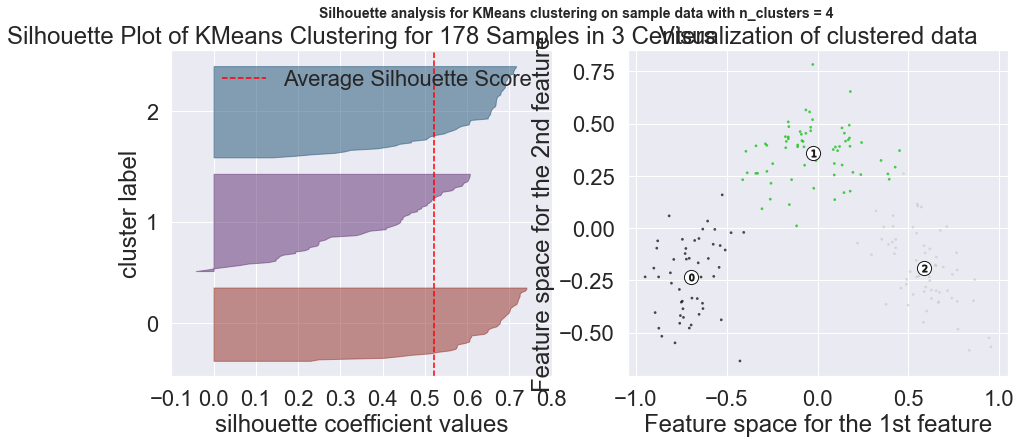

In [97]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_minmax_df)

# 2nd Plot showing actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_minmax_df.iloc[:, 0], pca_minmax_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters:

centers1 = model_kmeans.cluster_centers_

# Draw white circles at cluster centers:

ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="Visualization of clustered data")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

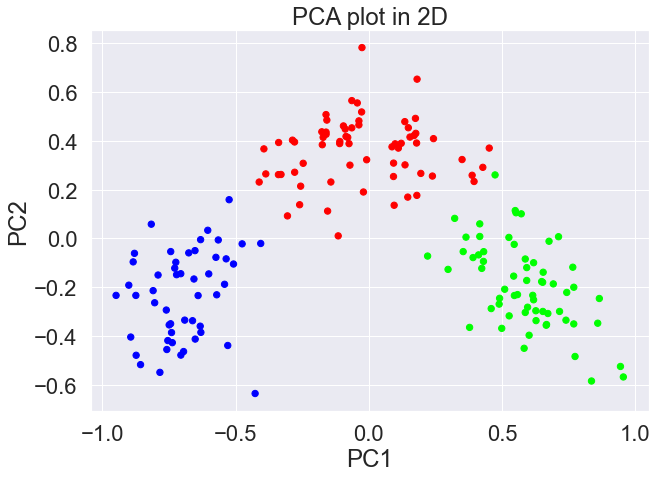

In [103]:
# Figure size:

plt.figure(figsize=(10,7))

# Scatterplot

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=wine_data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Now we can clearly see that the 03 No. of clusters are formed**

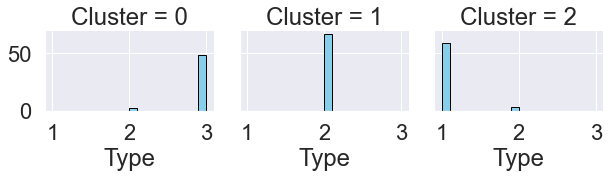

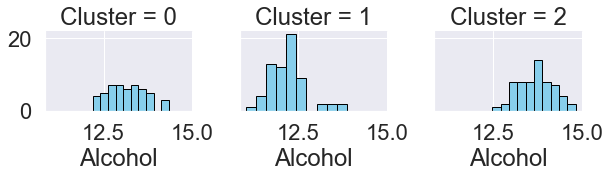

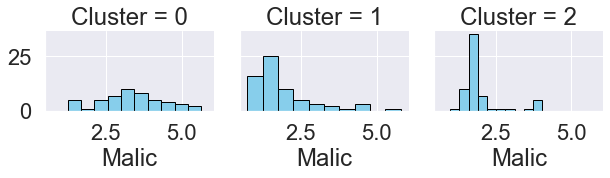

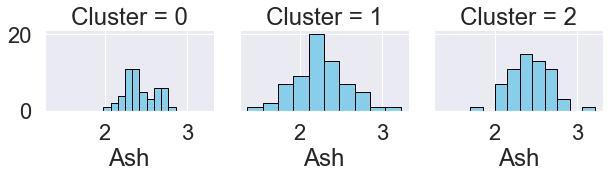

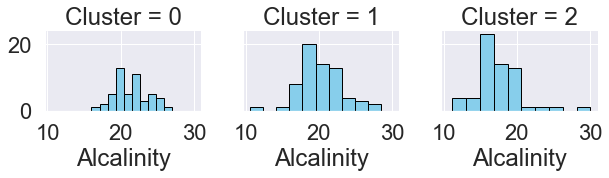

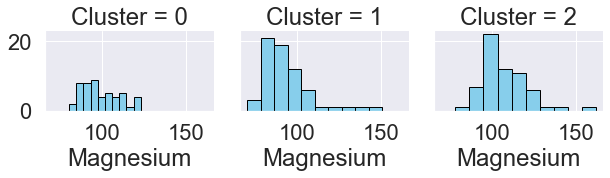

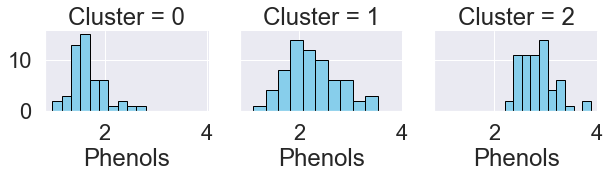

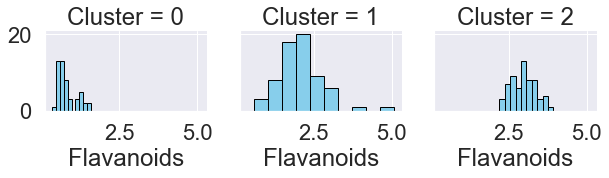

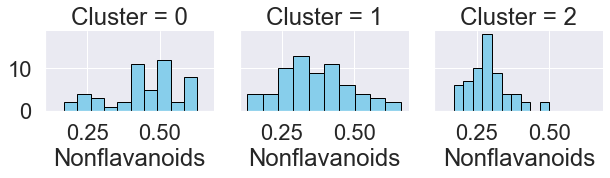

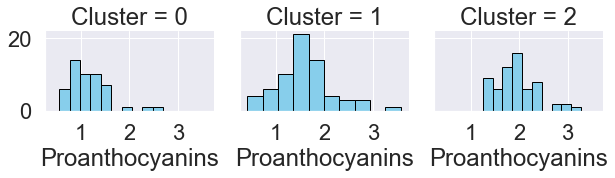

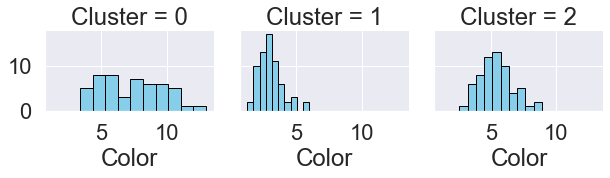

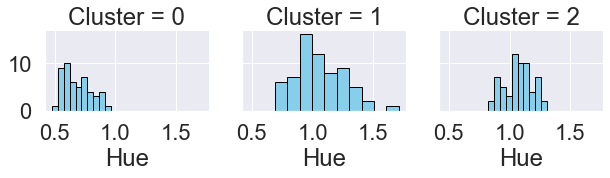

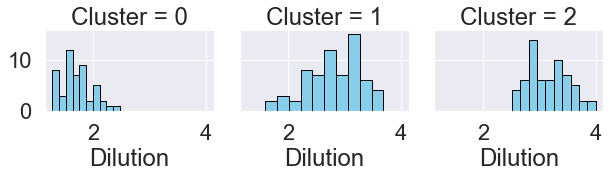

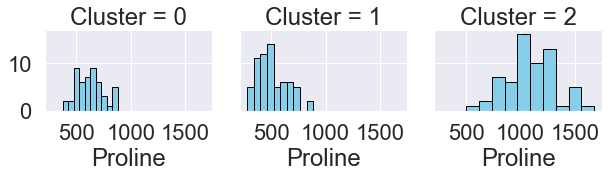

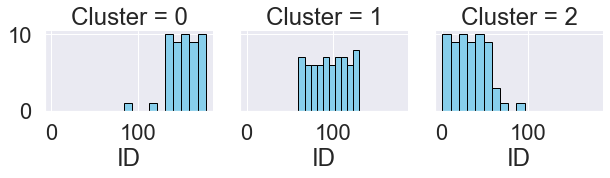

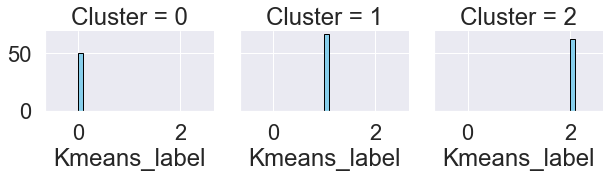

In [105]:
wine_data_df_1 = wine_data.copy()
wine_data_df_1['Cluster'] = model_kmeans.labels_

aux=wine_data_df_1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_data_df_1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [106]:
# Now we will sort the elements based on cluster label assigned and take the average for insights.

cluster_1 = pd.DataFrame(wine_data_df_1.loc[wine_data_df_1.Cluster==0].mean(),columns= ['Cluster_1_avg'])
cluster_2 = pd.DataFrame(wine_data_df_1.loc[wine_data_df_1.Cluster==1].mean(),columns= ['Cluster_2_avg'])
cluster_3 = pd.DataFrame(wine_data_df_1.loc[wine_data_df_1.Cluster==2].mean(),columns= ['Cluster_2_avg'])

In [107]:
avg_df = pd.concat([cluster_1,cluster_2,cluster_3],axis=1)
avg_df

Cluster_1_avg  Cluster_2_avg  Cluster_2_avg
Type             2.9600         2.000000       1.048387     
Alcohol          13.1440        12.233333      13.701774    
Malic            3.3462         1.905000       1.981129     
Ash              2.4256         2.251212       2.441613     
Alcalinity       21.3300        20.218182      17.245161    
Magnesium        98.6400        93.469697      107.306452   
Phenols          1.6772         2.247273       2.844355     
Flavanoids       0.8070         2.069091       2.972581     
Nonflavanoids    0.4504         0.363485       0.288710     
Proanthocyanins  1.1564         1.602727       1.928710     
Color            7.2644         3.025758       5.442258     
Hue              0.6862         1.058576       1.068548     
Dilution         1.6988         2.792727       3.155161     
Proline          622.4400       508.696970     1100.822581  
ID               152.3800       95.530303      32.370968    
Kmeans_label     0.0000         1.000000       2.000000     
Cluster          0.0000         1.000000       2.000000

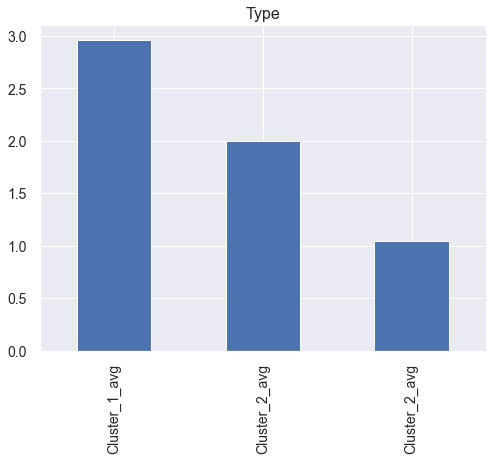

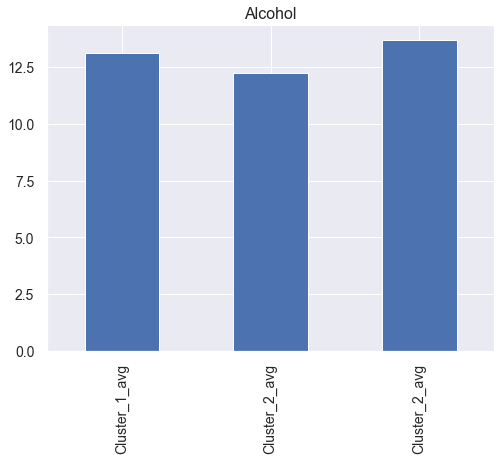

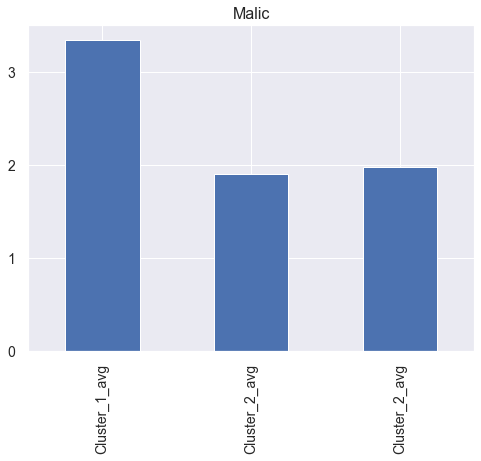

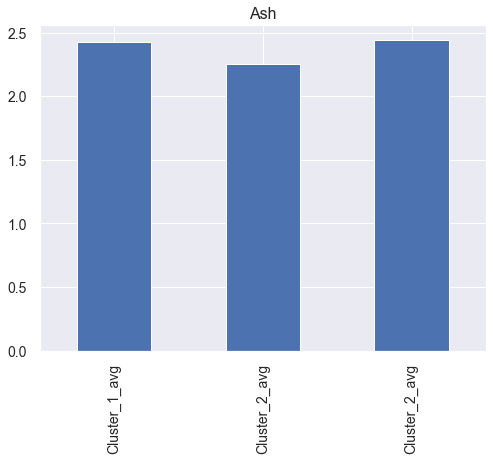

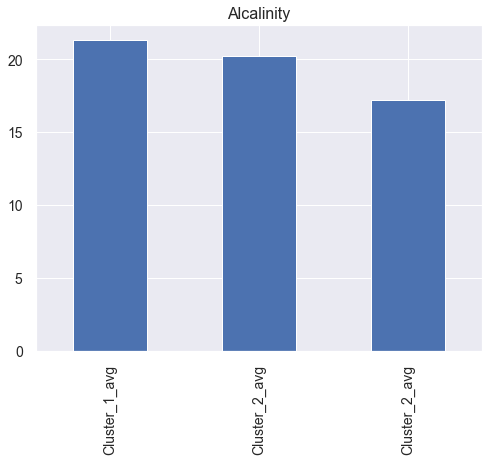

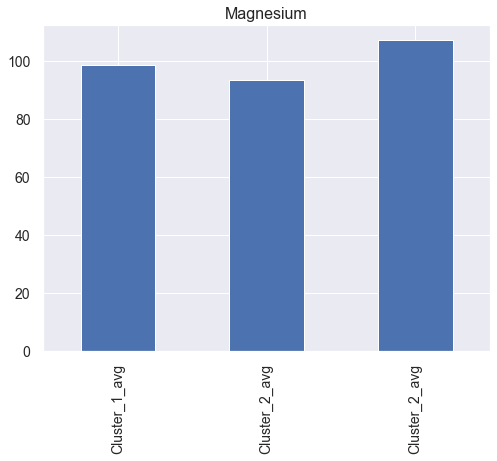

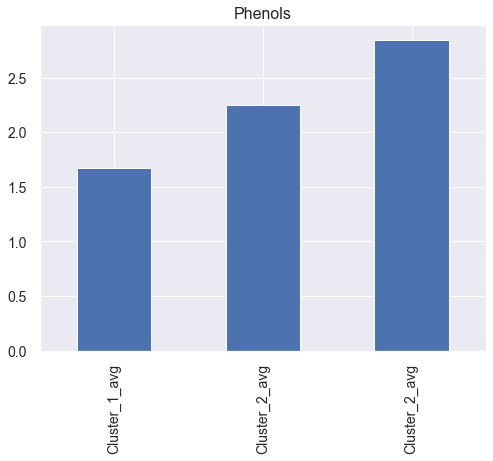

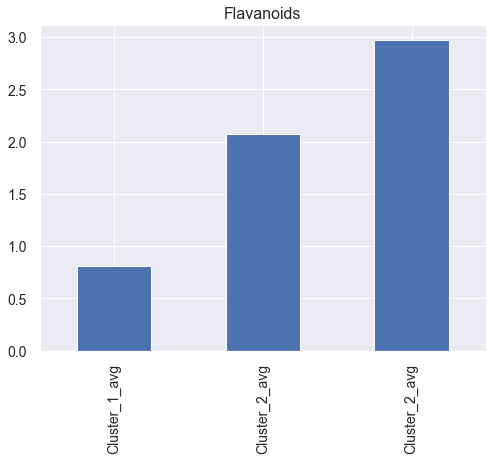

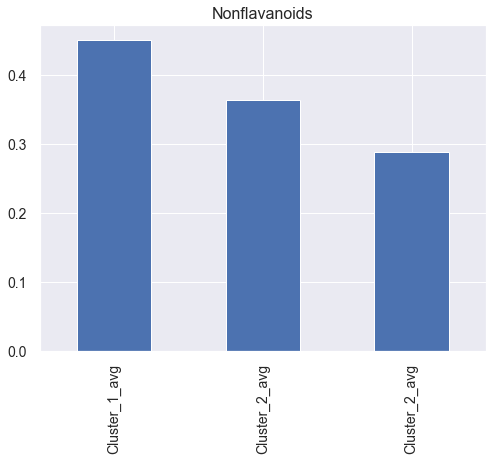

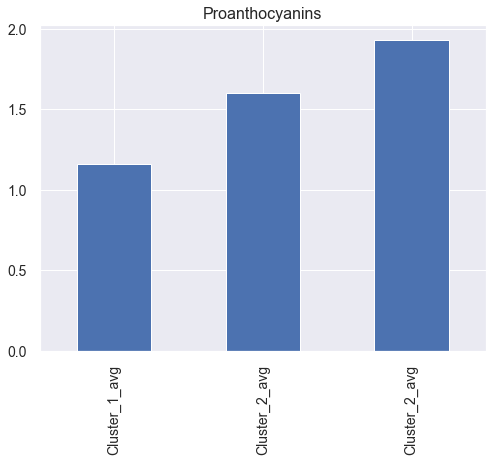

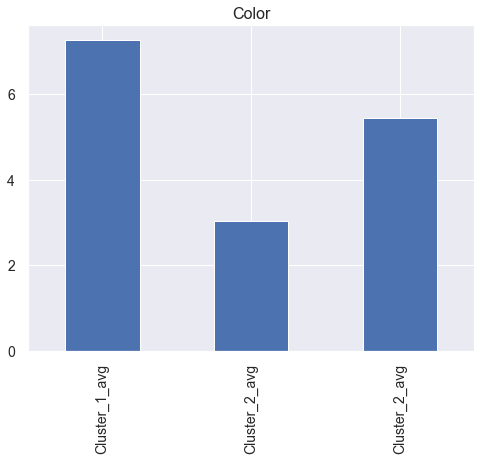

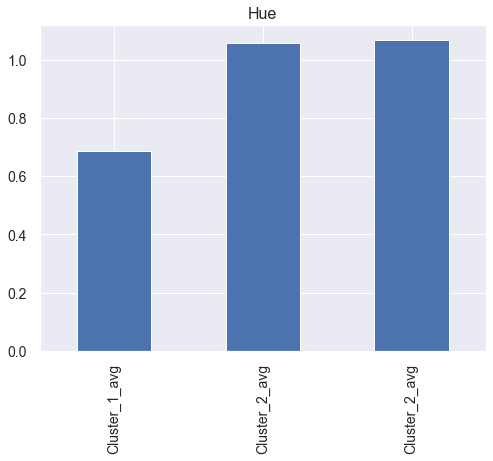

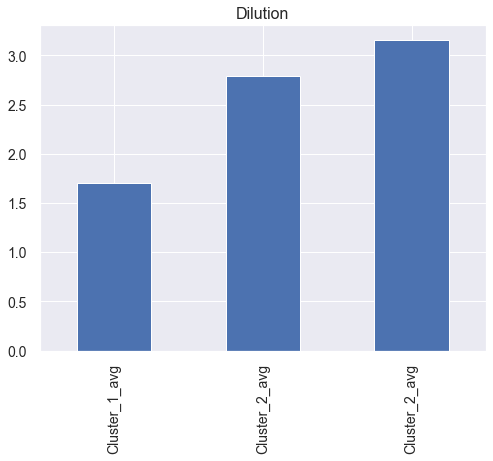

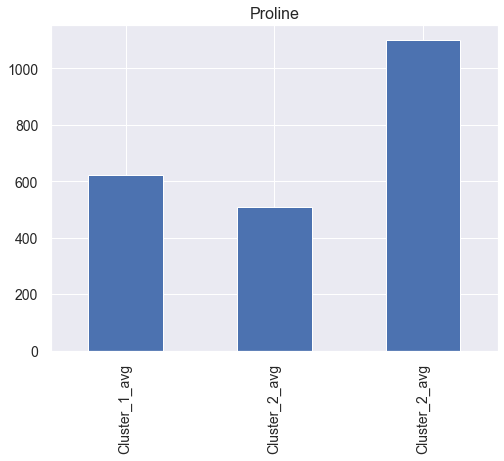

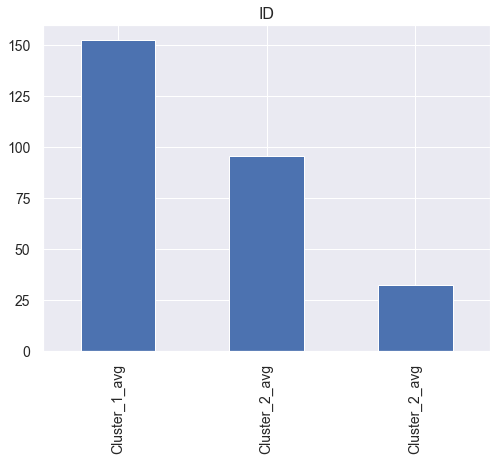

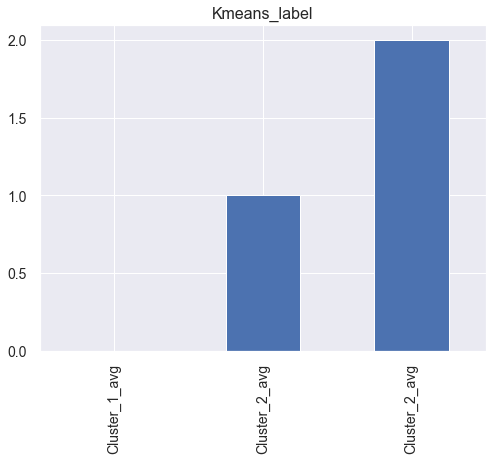

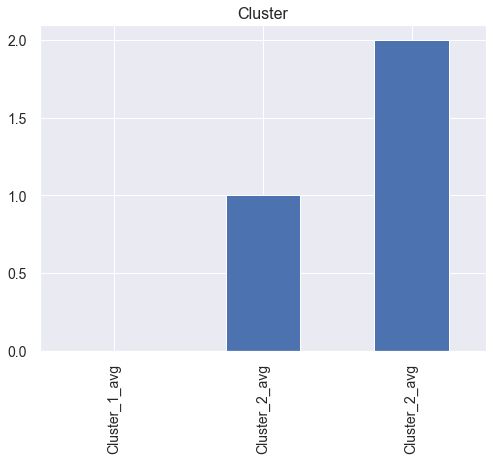

In [108]:
# Extract and plot one Column data by using .xs method:

for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

## 5 A.5 Comparing KMeans Clusters with Original Classified Dataset using "Type" Feature:

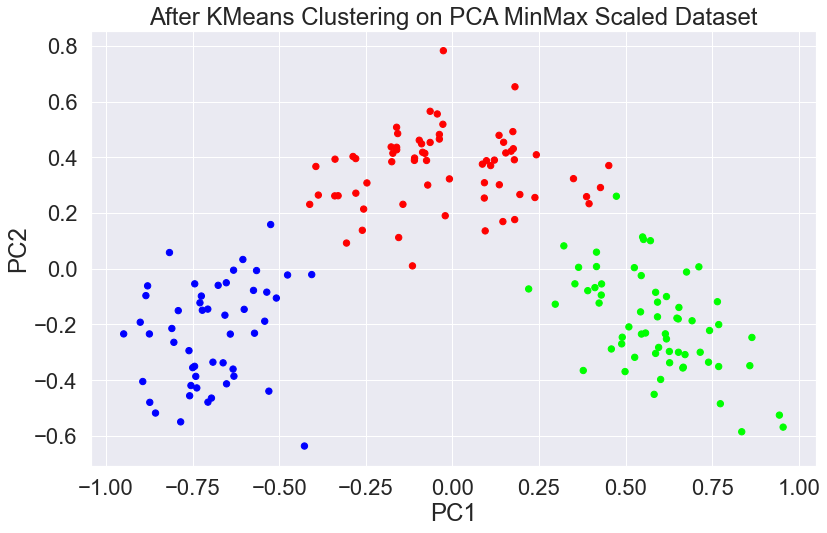

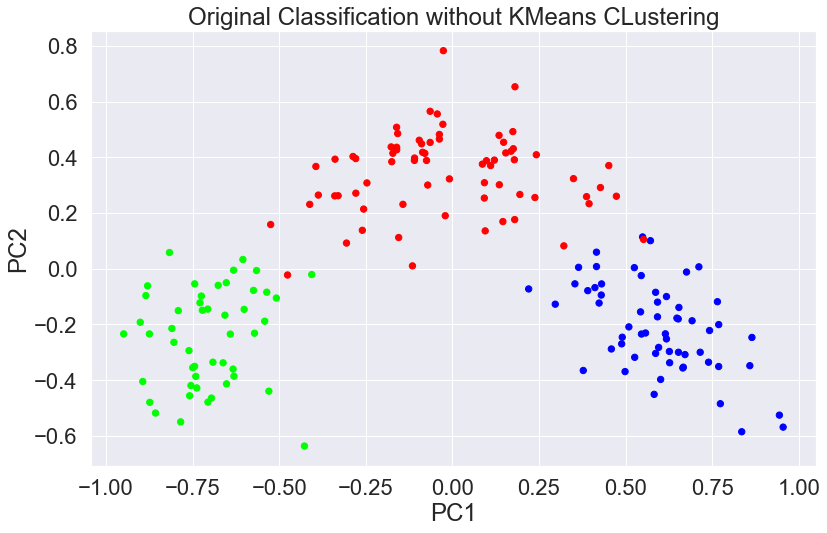

In [109]:
# Scatterplot:

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=wine_data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics:

plt.title('After KMeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot:

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=wine_data['Type'], cmap="brg", s=40)

# Aesthetics:

plt.title('Original Classification without KMeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [115]:
# Group data by Clusters (K=3)

display('After Applying PCA and KMenas CLustering on Dataset',wine_data.groupby('Kmeans_label').agg(['mean']),'Original Classified Dataset',wine_data.groupby('Type').agg(['mean']))

'After Applying PCA and KMenas CLustering on Dataset'

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000  98.640000    
1             2.000000  12.233333  1.905000  2.251212  20.218182  93.469697    
2             1.048387  13.701774  1.981129  2.441613  17.245161  107.306452   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200  0.807000   0.450400      1.156400        7.264400   
1             2.247273  2.069091   0.363485      1.602727        3.025758   
2             2.844355  2.972581   0.288710      1.928710        5.442258   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800  622.440000   152.380000  
1             1.058576  2.792727  508.696970   95.530303   
2             1.068548  3.155161  1100.822581  32.370968

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.000000     
2     519.507042   95.0   1.014085     
3     629.895833   154.5  0.000000

**Observation:**
    
Type 2 has been perfectly clustered and rest of all has negliglable amount of difference.
We have perfectly clustered data into Three Types as compared to classification of three types of Wine was indicated in Original Dataset in 'Type' Column

## 5 A.6         t-SNE:

In [120]:
# t-SNE:

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(minmax_df)

# Convert it to the Dataframe:

tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp.1', 'tsne comp.2'])

# Shape and preview:

print(tsne_df.shape)
tsne_df.head()

(178, 2)


tsne comp.1  tsne comp.2
0  11.988268    5.718069   
1  11.436400   -0.756210   
2  13.730698    2.009786   
3  15.547105    3.778337   
4  8.701944     1.235718

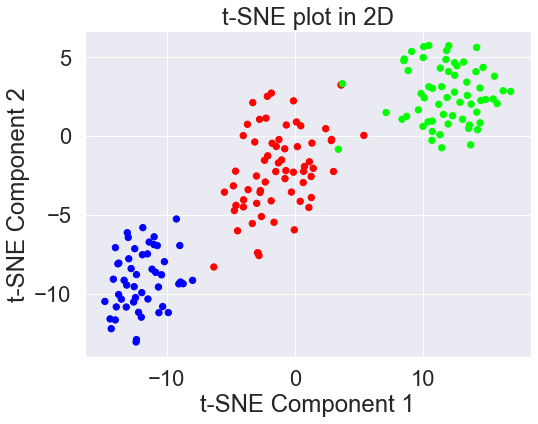

In [123]:
# Figure size:
plt.figure(figsize=(8,6))

# Scatterplot:
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=wine_data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics:
plt.title('t-SNE plot in 2D')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# 5 B. Hierarchical Clustering Algorithm:

## 5 B.1 Dendogram on PCA MinMaxScaler Applied Dataset:

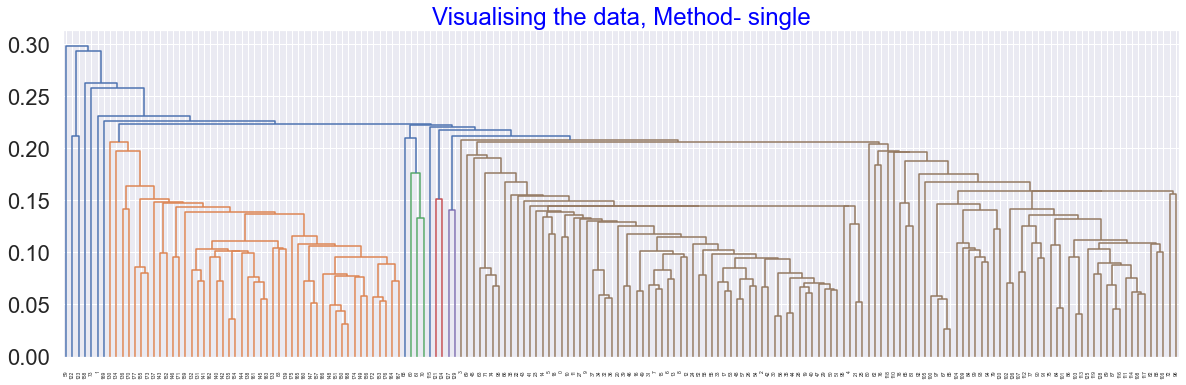

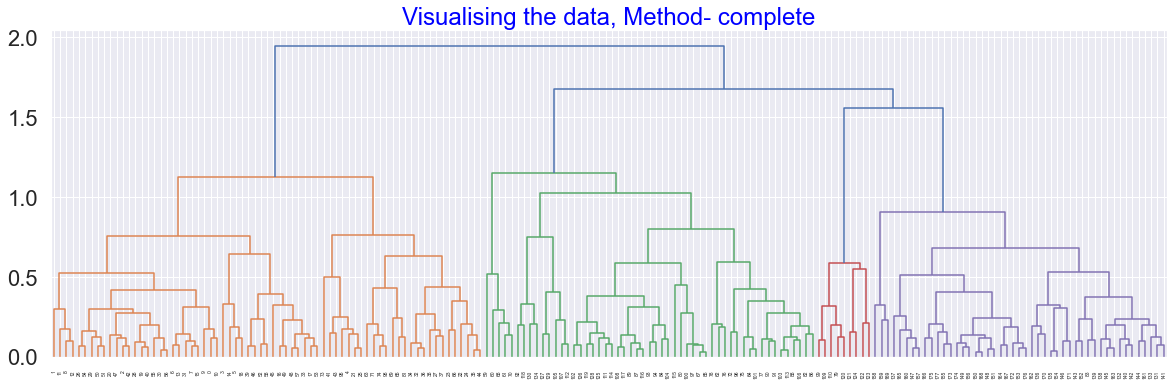

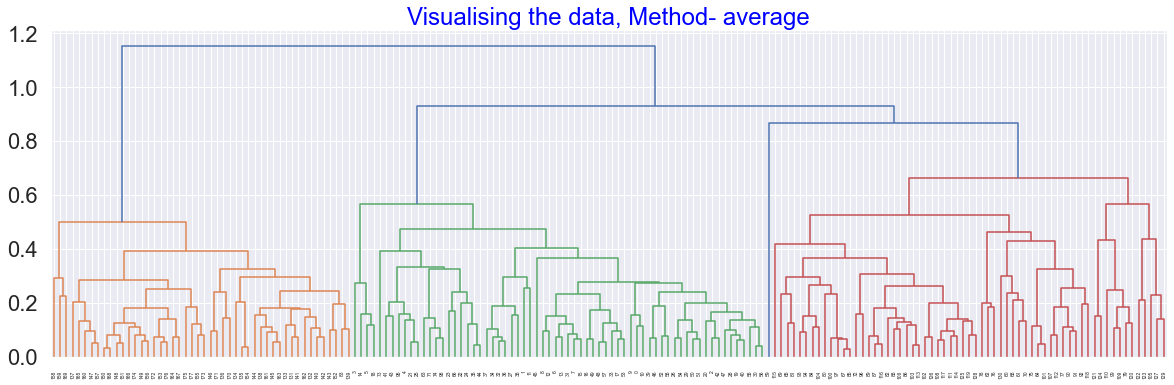

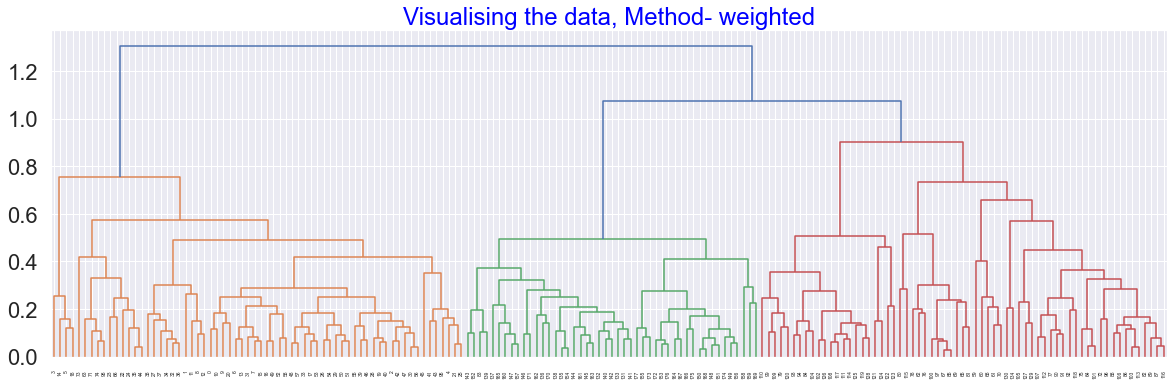

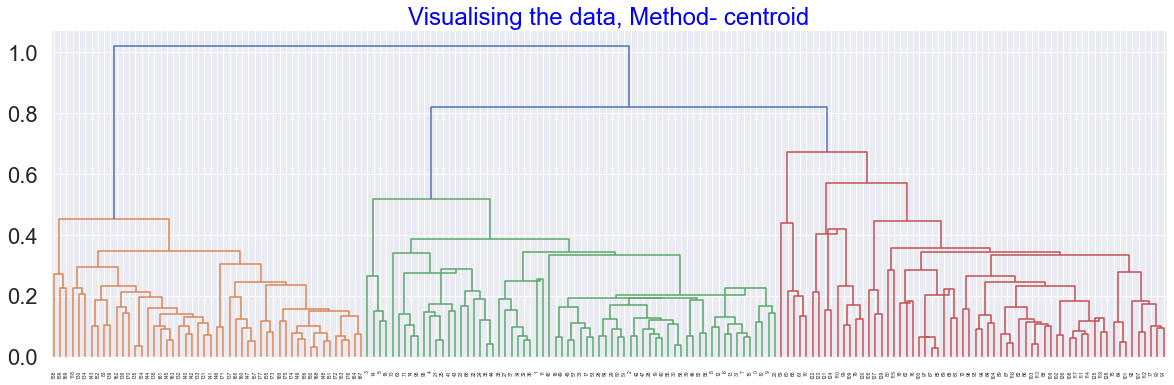

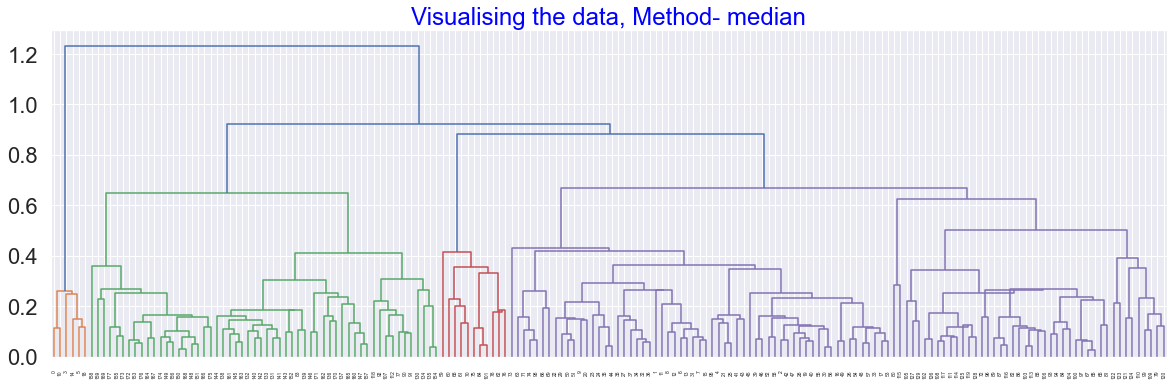

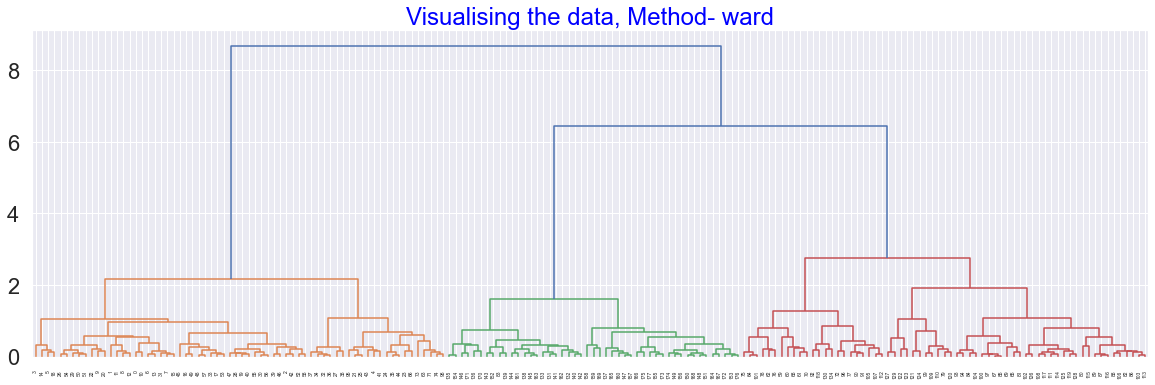

In [124]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram_1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

## 5 B.2 (A) Silhouette Score method for PCA MinMax Scaled Data:

### 5 B.2 (A.1) Applying Different Linkages using Euclidean Method for distance Calculation:

In [125]:
 # Always start number from 2
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hierc_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hierc_labels1 = hierc_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hierc_labels1)
        print("For n_clusters =", n_clusters,"The Average Silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The Average Silhouette_score with linkage- ward : 0.44369351506555055
For n_clusters = 2 The Average Silhouette_score with linkage- complete : 0.4448273929121036
For n_clusters = 2 The Average Silhouette_score with linkage- average : 0.4598802263684806
For n_clusters = 2 The Average Silhouette_score with linkage- single : 0.1934738767787822

For n_clusters = 3 The Average Silhouette_score with linkage- ward : 0.512478461893362
For n_clusters = 3 The Average Silhouette_score with linkage- complete : 0.45525090342803276
For n_clusters = 3 The Average Silhouette_score with linkage- average : 0.5163908228025497
For n_clusters = 3 The Average Silhouette_score with linkage- single : -0.004466488818666292

For n_clusters = 4 The Average Silhouette_score with linkage- ward : 0.4562664176188691
For n_clusters = 4 The Average Silhouette_score with linkage- complete : 0.46813138010224736
For n_clusters = 4 The Average Silhouette_score with linkage- average : 0.48406949417678735

### 5 B.2 (A.2) Applying Different Linkages using Different Distance Methods:

In [126]:
# Always start number from 2
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hierc_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) 
            hierc_labels1 = hierc_cluster1.fit_predict(pca_minmax_df)
            silhouette_score1 = sil(pca_minmax_df, hierc_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4448273929121036
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.21595497316869955
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4448273929121036
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.21595497316869955
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4448273929121036

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.4545020334169387
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.4598802263684806
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.45450

**Seperation in each Linkages and Distance Methods indicate that 3 is the optimal No. for clusters**

For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l2 : 0.5163908228025497
For n_clusters = 3 The average silhouette_score with linkage- ward : and Affinity - Euclidean : 0.512478461893362

Ward method is actually a method that tries to minimize the variance within each cluster. 
In K-means, when we were trying to minimize the WCSS to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing WCSS, we are minimizing the within-cluster variants. 
That is the variance within each cluster.

# 5 B.3 Dendrogram on Standard Scaler Applied on Data:

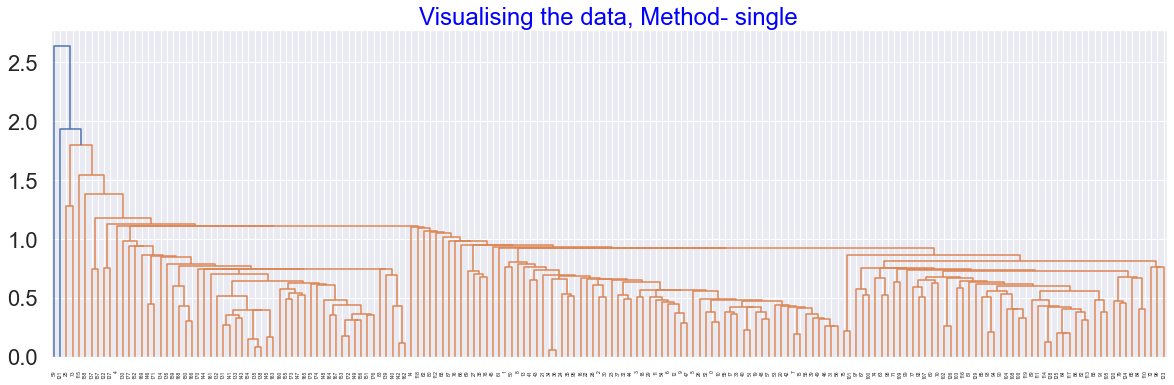

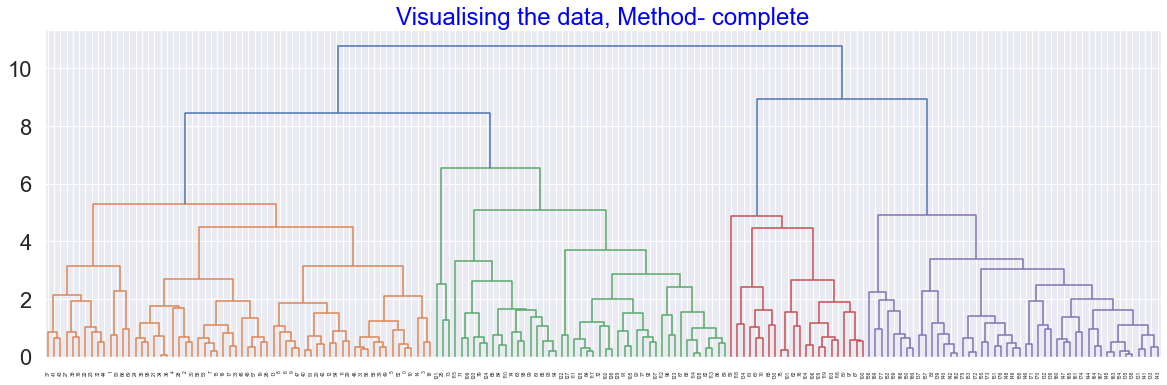

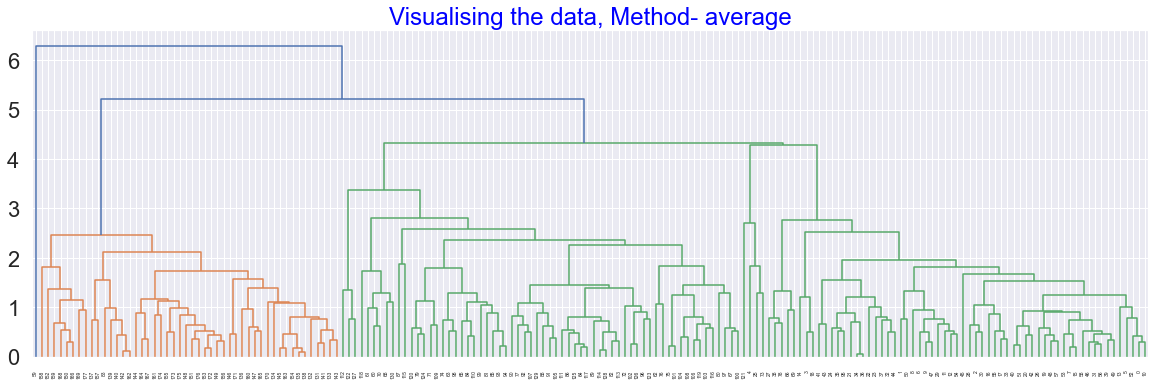

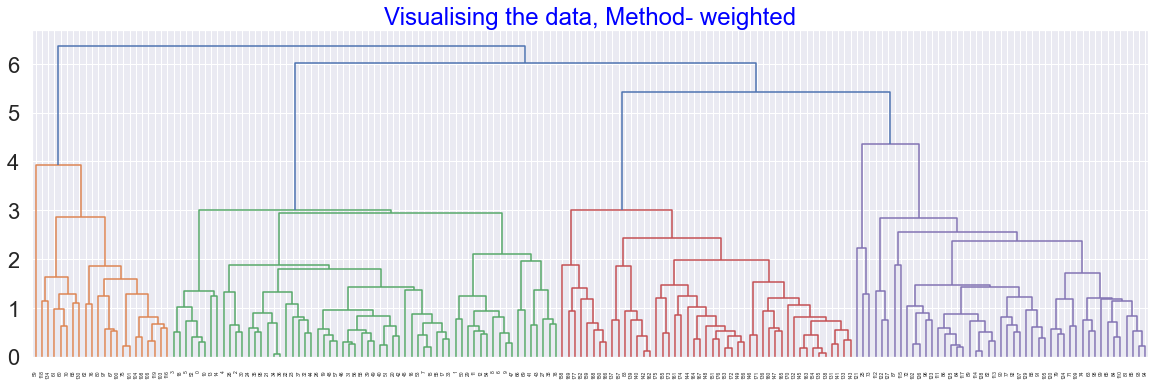

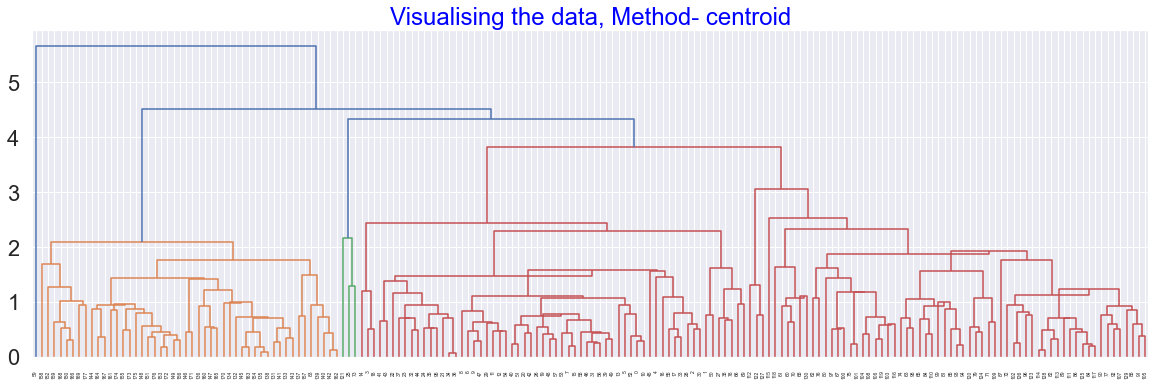

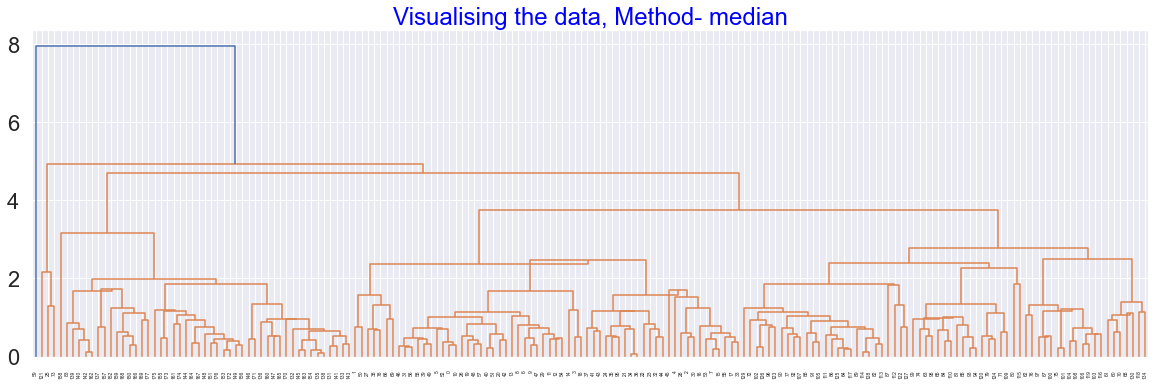

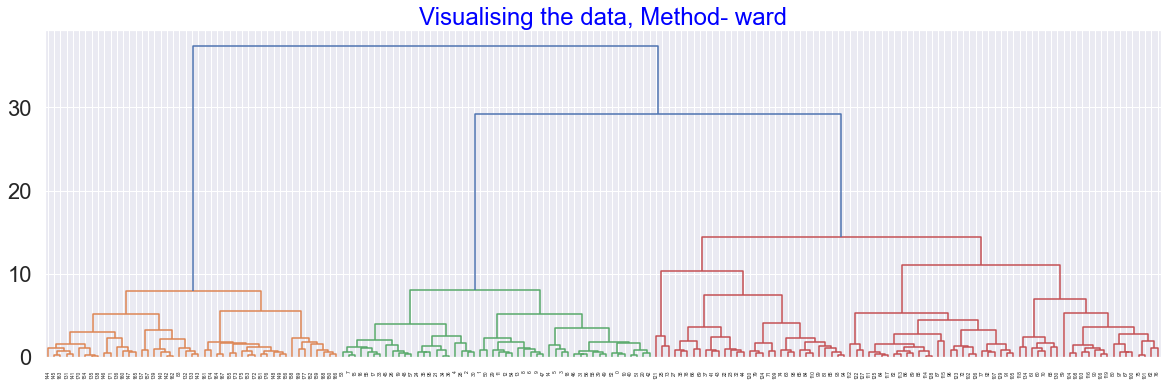

In [127]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram_2 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

## 5 B.3 (A) Silhouette Score method for PCA Standard Scaled Data:

## 5 B.3 (A.1) Applying Different Linkages using Euclidean Method for distance Calculation:

In [128]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hierc_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hierc_labels1 = hierc_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hierc_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.41877970090924654
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- average : 0.34854041549326387
For n_clusters = 2 The average silhouette_score with linkage- single : 0.34854041549326387

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.435535266166781
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.29482654329265323
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4025547835526692
For n_clusters = 3 The average silhouette_score with linkage- single : 0.25789382473384354

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3739703958691178
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4171188330984906
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4689067590764211


## 5 B.3 (A.2) Applying Different Linkages using Different Distance Methods:

In [129]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hierc_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)  
            hierc_labels1 = hierc_cluster1.fit_predict(pca_std_df)
            silhouette_score1 = sil(pca_std_df, hierc_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4246715959380682

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.34854041549326387
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.34854041549326387
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.34854041549326387
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.

**Conclusion:** 

Max. score is with cluster numbers 4 in Standard Scaler Transformation.

For n_clusters = 4 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4731230759943259
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.435535266166781

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. 

There are two types of hierarchical clustering: Agglomerative clustering & Divisive clustering.

We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. 
Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined.

## Run Hierarchical Clustering (Agglomerative Clustering) For PCA on Standard Scaled Data:

In [130]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hierc = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hierc.shape)
y_pred_hierc

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [131]:
agg_clustering.n_clusters_

4

In [132]:
(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

47.312

### Putting Cluster lables into original dataset & analysis of the same:

In [133]:
# Concating Labels with main dataset copy:

wine_data['Hierarchical_labels'] = agg_clustering.labels_
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1  1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2  1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3  1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4  1     13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             1                    
1  2             1                    
2  2             1                    
3  2             1                    
4  2             1

In [134]:
wine_data.groupby('Hierarchical_labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.016129  12.249516  1.972097  2.249839  20.193548   
1                    1.107692  13.622615  1.927692  2.395692  16.955385   
2                    2.979167  13.157708  3.386042  2.437083  21.510417   
3                    1.666667  12.533333  1.923333  3.016667  27.833333   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                    92.000000   2.182419  1.959194   0.370645       
1                    106.738462  2.821385  2.942154   0.283077       
2                    98.541667   1.681667  0.788542   0.455833       
3                    127.333333  3.036667  3.550000   0.383333       

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                    1.529516        2.937097  1.042516  2.740000   
1                    1.946923        5.378308  1.070308  3.124308   
2                    1.167708        7.410833  0.684375  1.698542   
3                    1.916667        4.310000  1.123333  3.463333   

                         Proline          ID Kmeans_label  
                            mean        mean         mean  
Hierarchical_labels                                        
0                    497.564516   97.403226   0.967742     
1                    1072.276923  35.400000   1.923077     
2                    627.500000   153.520833  0.000000     
3                    760.000000   74.000000   1.666667

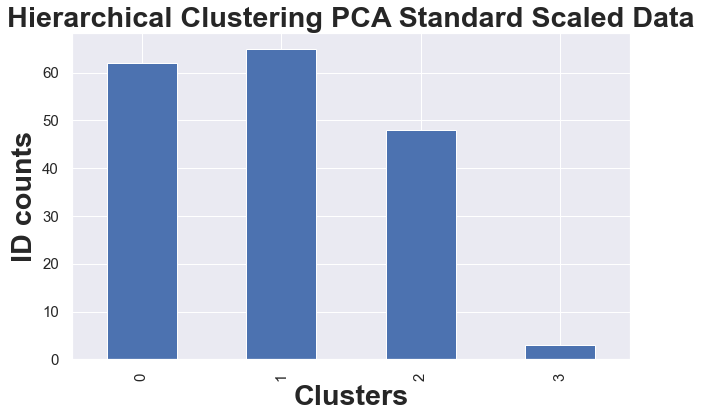

In [136]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster:

fig, ax = plt.subplots(figsize=(10, 6))
wine_data.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

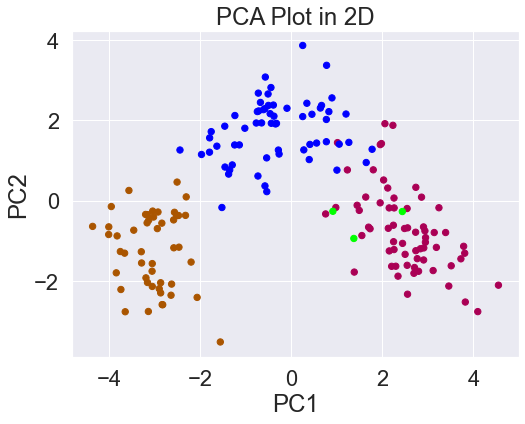

In [137]:
# Figure size:

plt.figure(figsize=(8,6))

# Scatterplot:

plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=wine_data['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics:

plt.title('PCA Plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Now, we can not clearly see that the 4 number of clusters were formed..

## Comparing Hierarchical Clusters with Original Classified Dataset using "Type" Feature

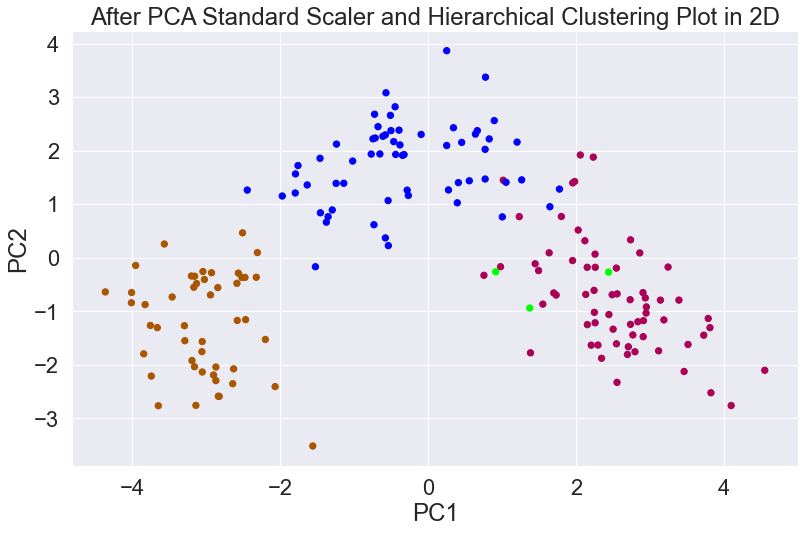

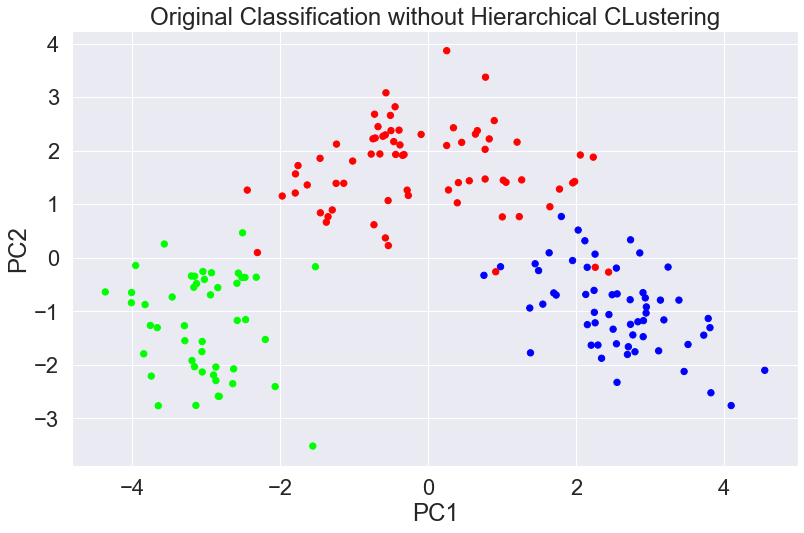

In [140]:
# Scatterplot:

plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=wine_data['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics:

plt.title('After PCA Standard Scaler and Hierarchical Clustering Plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot:

plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=wine_data_df_1['Type'], cmap="brg", s=40)

# Aesthetics:

plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [144]:
# Group data by Clusters (Clusters=4):

display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',wine_data.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',wine_data_df_1.groupby('Type').agg(['mean']))

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.016129  12.249516  1.972097  2.249839  20.193548   
1                    1.107692  13.622615  1.927692  2.395692  16.955385   
2                    2.979167  13.157708  3.386042  2.437083  21.510417   
3                    1.666667  12.533333  1.923333  3.016667  27.833333   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                    92.000000   2.182419  1.959194   0.370645       
1                    106.738462  2.821385  2.942154   0.283077       
2                    98.541667   1.681667  0.788542   0.455833       
3                    127.333333  3.036667  3.550000   0.383333       

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                    1.529516        2.937097  1.042516  2.740000   
1                    1.946923        5.378308  1.070308  3.124308   
2                    1.167708        7.410833  0.684375  1.698542   
3                    1.916667        4.310000  1.123333  3.463333   

                         Proline          ID Kmeans_label  
                            mean        mean         mean  
Hierarchical_labels                                        
0                    497.564516   97.403226   0.967742     
1                    1072.276923  35.400000   1.923077     
2                    627.500000   153.520833  0.000000     
3                    760.000000   74.000000   1.666667

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label   Cluster  
             mean   mean         mean      mean  
Type                                             
1     1115.711864  30.0   2.000000     2.000000  
2     519.507042   95.0   1.014085     1.014085  
3     629.895833   154.5  0.000000     0.000000

**Observation:**
    
Most of the data is in the first 03 clusters and very little amount of data in the last cluster.
So, it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

## Run Hierarchical Clustering (Agglomerative Clustering) For PCA on MinMaxScaled Data:

In [145]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hierc = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hierc.shape)
y_pred_hierc

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [146]:
agg_clustering.n_clusters_

3

In [147]:
(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3) # Clustering Score

51.639

### Putting Cluster lables into original dataset & analysis of the same:

In [149]:
# Concating Labels with main dataset copy

wine_data['Hierarchical_labels'] = agg_clustering.labels_
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1  1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2  1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3  1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4  1     13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             2                    
1  2             2                    
2  2             2                    
3  2             2                    
4  2             2

In [150]:
wine_data.groupby('Hierarchical_labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.015625  12.226094  1.964219  2.244531  20.076563   
1                    2.979167  13.157708  3.386042  2.437083  21.510417   
2                    1.106061  13.637424  1.933788  2.433485  17.465152   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                    93.890625   2.157969  1.987656   0.372812       
1                    98.541667   1.681667  0.788542   0.455833       
2                    106.287879  2.874242  2.971970   0.282879       

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                    1.565781        2.994687  1.042437  2.746875   
1                    1.167708        7.410833  0.684375  1.698542   
2                    1.923030        5.347879  1.073636  3.144697   

                         Proline          ID Kmeans_label  
                            mean        mean         mean  
Hierarchical_labels                                        
0                    503.125000   97.578125   0.968750     
1                    627.500000   153.520833  0.000000     
2                    1070.106061  35.106061   1.939394

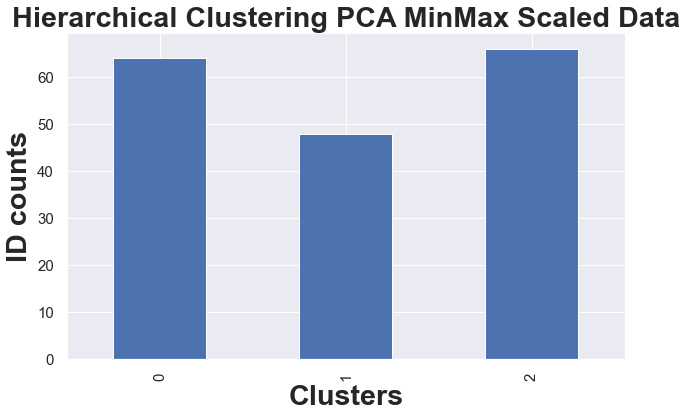

In [152]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
wine_data.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

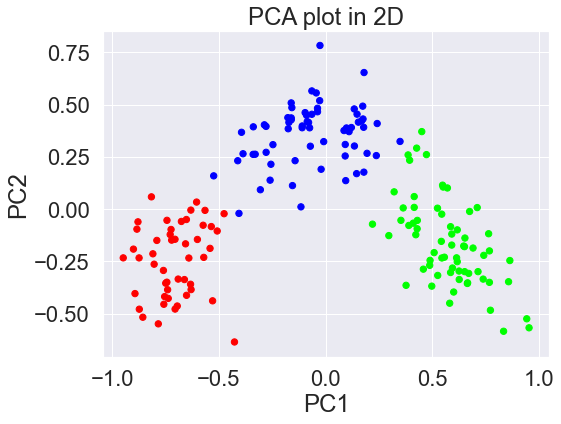

In [153]:
# Figure size:

plt.figure(figsize=(8,6))

# Scatterplot:

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=wine_data['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics:

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Now, We can clearly see that the 03 number of clusters are formed.

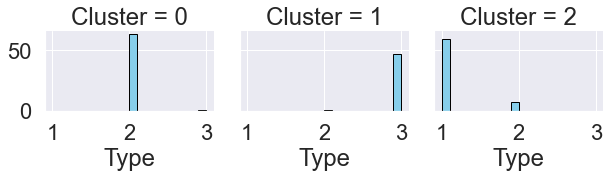

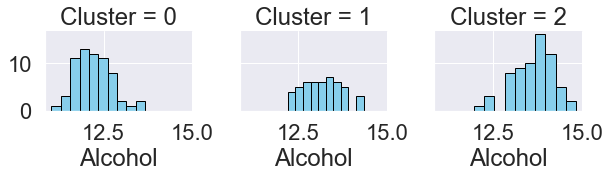

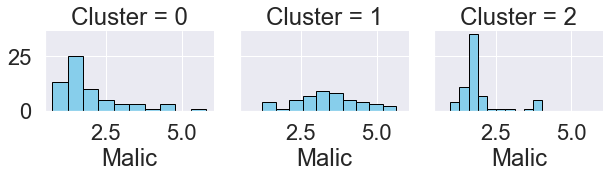

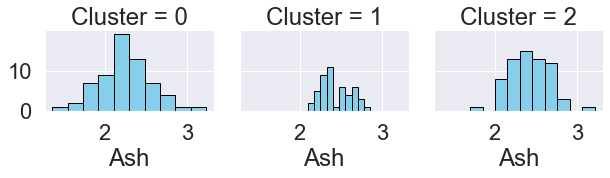

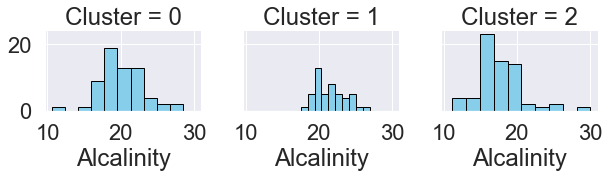

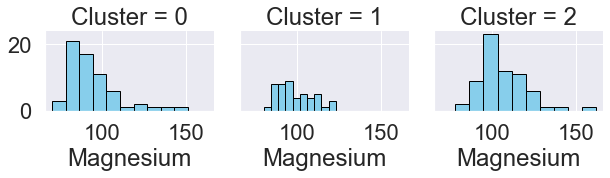

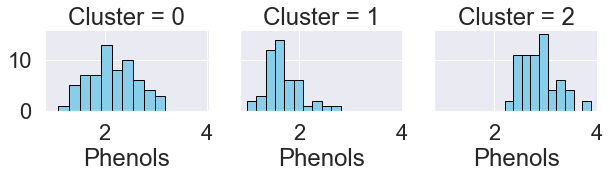

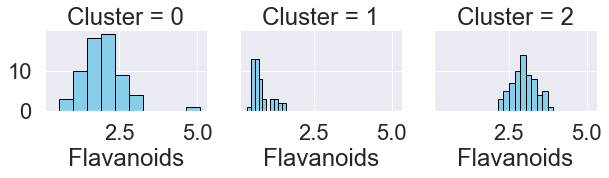

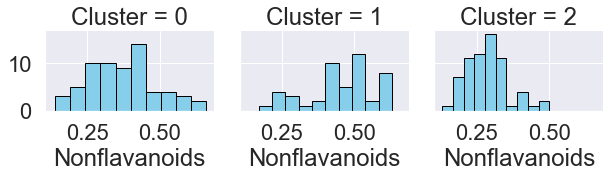

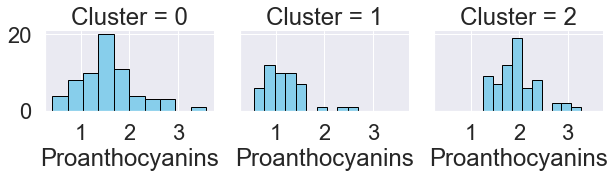

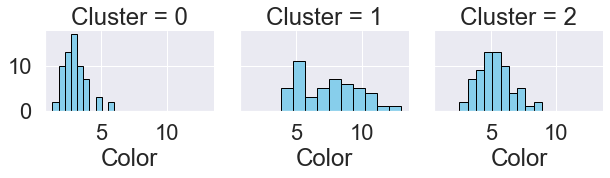

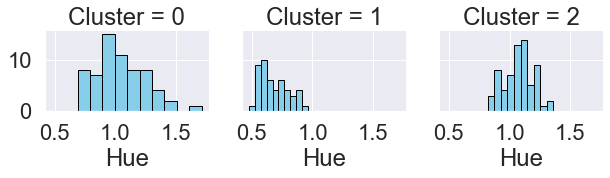

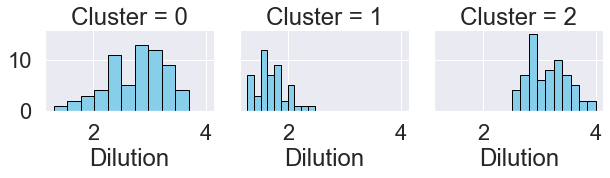

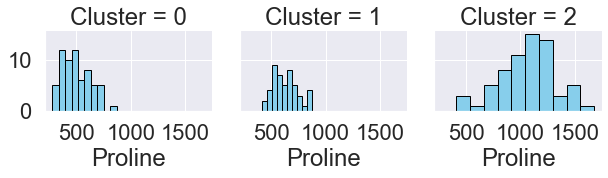

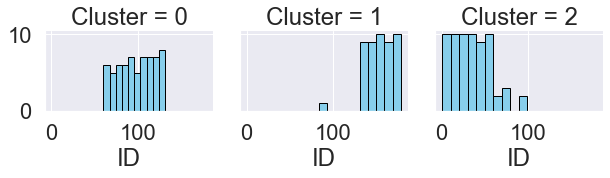

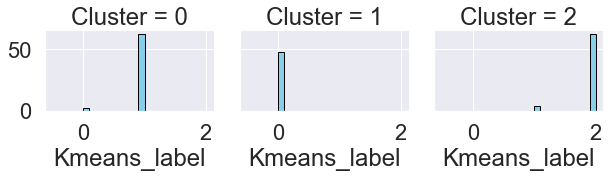

In [155]:
df_1 = wine_data.copy()
df_1.rename({"Hierarchical_labels":'Cluster'}, axis=1,inplace=True)

aux=df_1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df_1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [158]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster_11 = pd.DataFrame(df_1.loc[df_1.Cluster==0].mean(),columns= ['Cluster11_avg'])
cluster_22 = pd.DataFrame(df_1.loc[df_1.Cluster==1].mean(),columns= ['Cluster22_avg'])
cluster_33= pd.DataFrame(df_1.loc[df_1.Cluster==2].mean(),columns= ['Cluster33_avg'])

In [159]:
avg_df = pd.concat([cluster_11,cluster_22,cluster_33],axis=1)
avg_df

Cluster11_avg  Cluster22_avg  Cluster33_avg
Type             2.015625       2.979167       1.106061     
Alcohol          12.226094      13.157708      13.637424    
Malic            1.964219       3.386042       1.933788     
Ash              2.244531       2.437083       2.433485     
Alcalinity       20.076563      21.510417      17.465152    
Magnesium        93.890625      98.541667      106.287879   
Phenols          2.157969       1.681667       2.874242     
Flavanoids       1.987656       0.788542       2.971970     
Nonflavanoids    0.372813       0.455833       0.282879     
Proanthocyanins  1.565781       1.167708       1.923030     
Color            2.994688       7.410833       5.347879     
Hue              1.042438       0.684375       1.073636     
Dilution         2.746875       1.698542       3.144697     
Proline          503.125000     627.500000     1070.106061  
ID               97.578125      153.520833     35.106061    
Kmeans_label     0.968750       0.000000       1.939394     
Cluster          0.000000       1.000000       2.000000

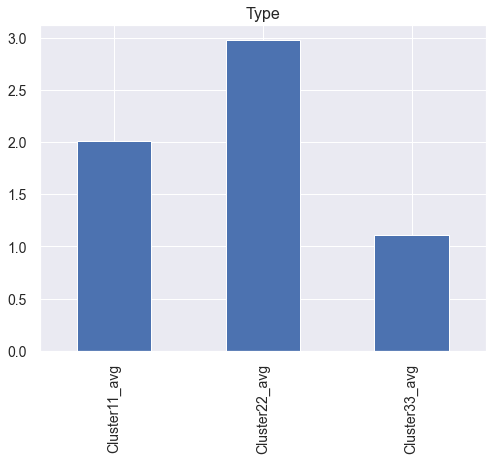

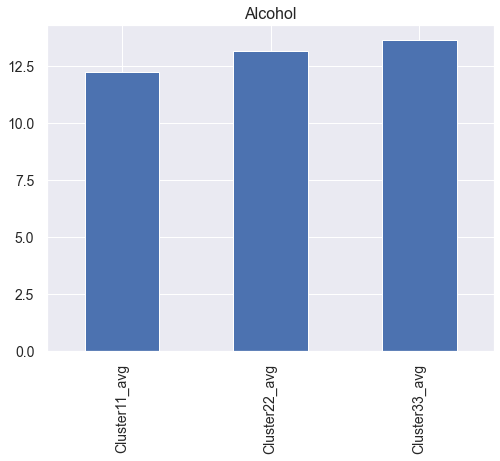

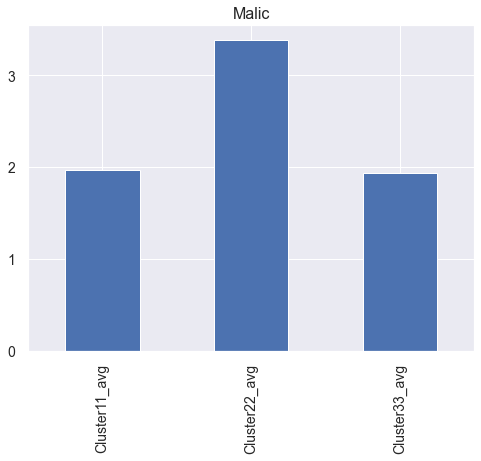

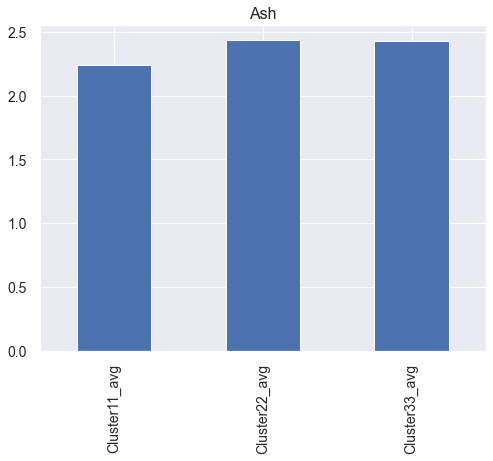

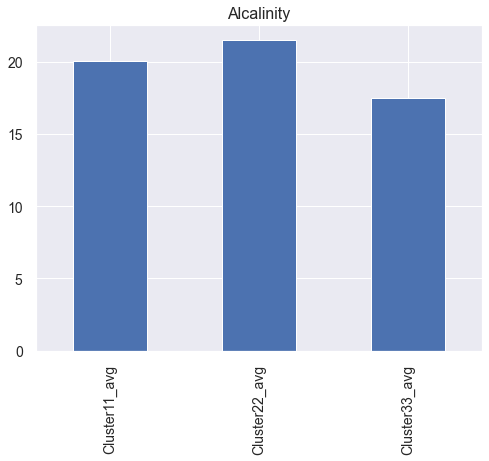

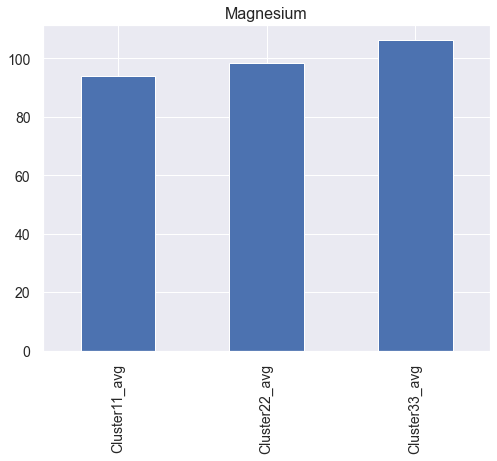

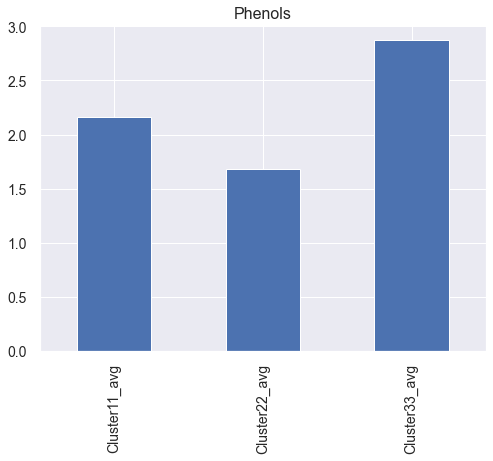

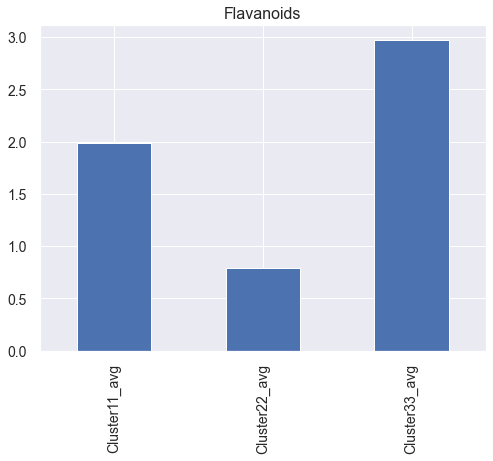

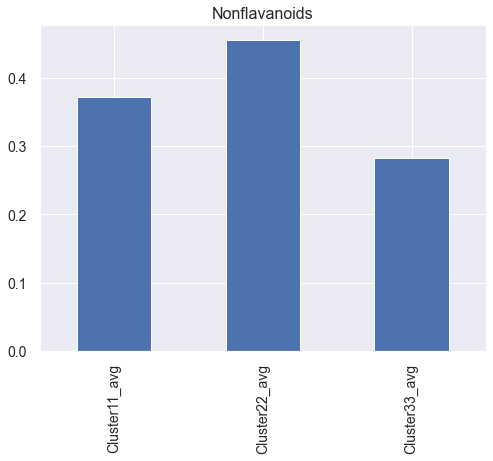

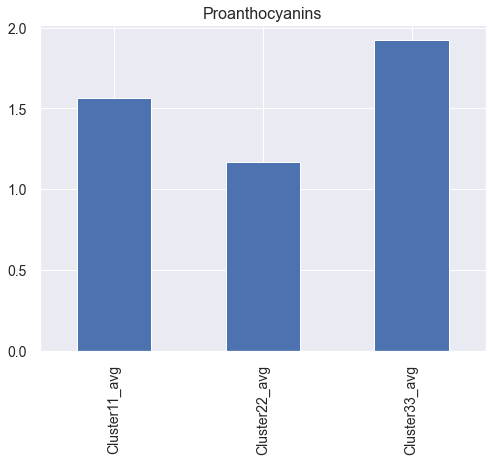

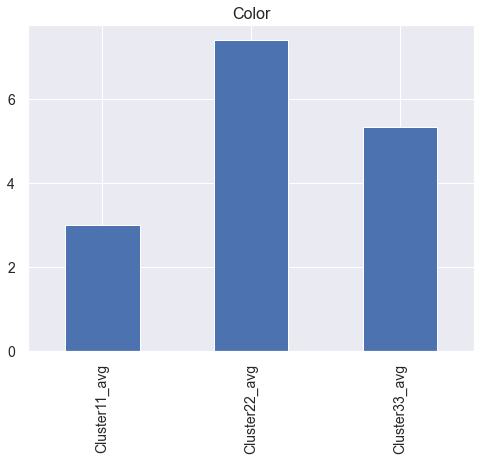

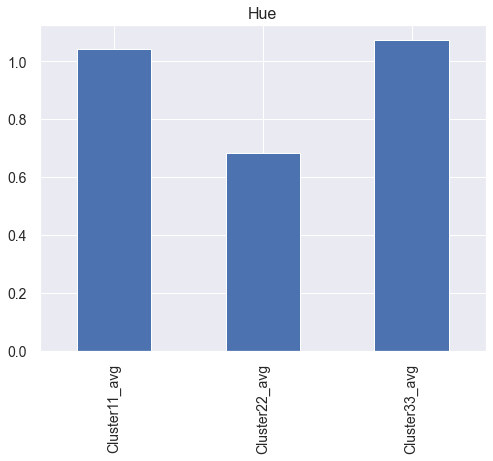

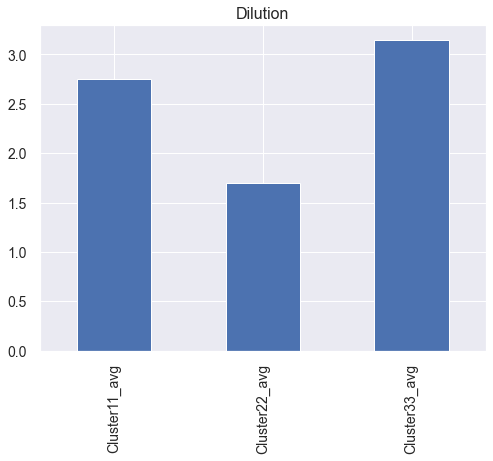

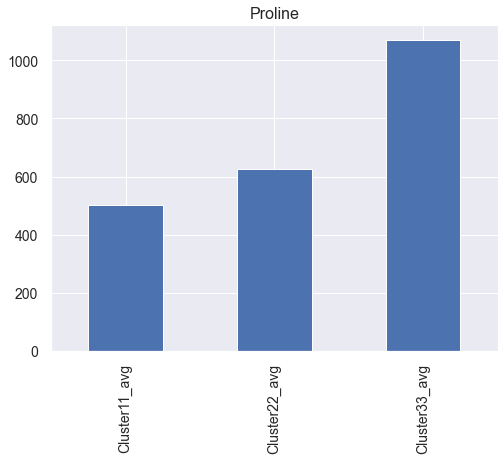

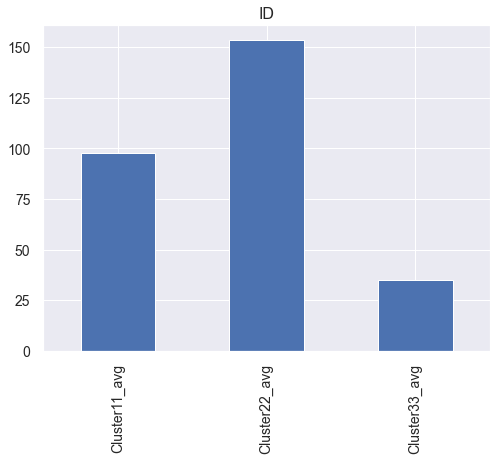

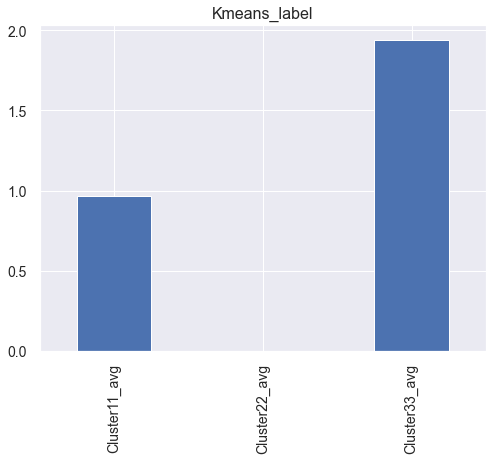

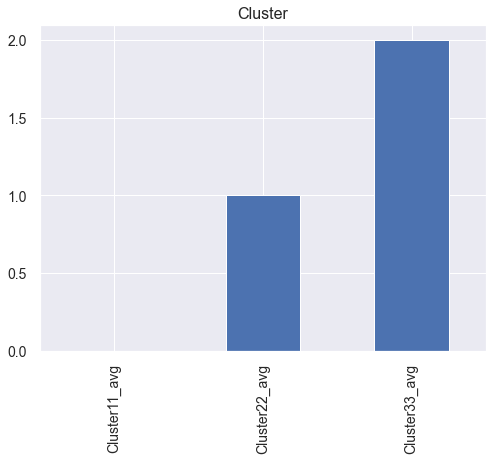

In [160]:
# Extract and plot one Column data ny using .xs method:

for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

## Comparing Hierarchical Clusters with Original Classified Dataset using "Type" Feature:

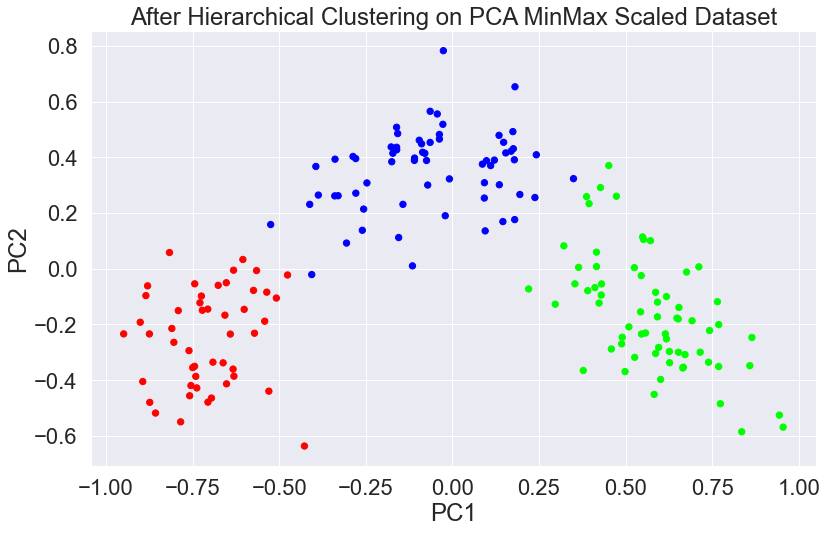

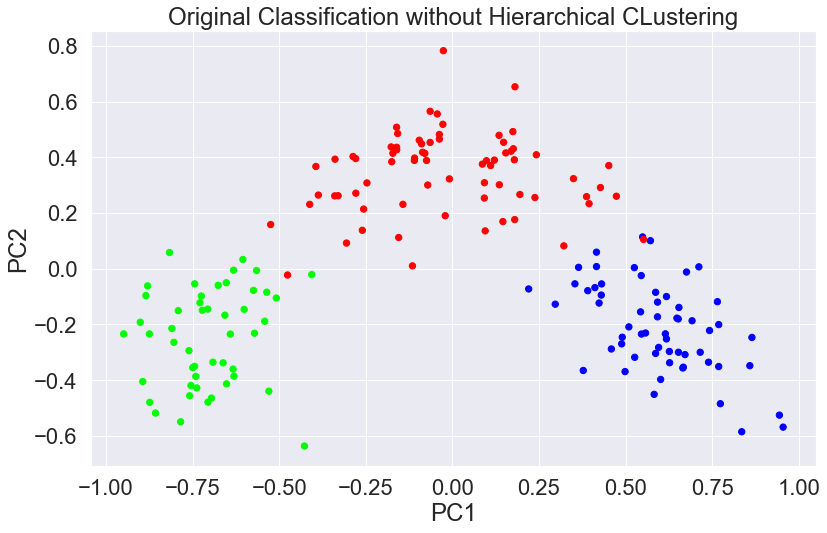

In [162]:
# Scatterplot:

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=wine_data['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics:

plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot:

plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=wine_data_df_1['Type'], cmap="brg", s=40)

# Aesthetics:

plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [163]:
# Group data by Clusters (K=3):

display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',wine_data.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',wine_data_df_1.groupby('Type').agg(['mean']))

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.015625  12.226094  1.964219  2.244531  20.076563   
1                    2.979167  13.157708  3.386042  2.437083  21.510417   
2                    1.106061  13.637424  1.933788  2.433485  17.465152   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                    93.890625   2.157969  1.987656   0.372812       
1                    98.541667   1.681667  0.788542   0.455833       
2                    106.287879  2.874242  2.971970   0.282879       

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                    1.565781        2.994687  1.042437  2.746875   
1                    1.167708        7.410833  0.684375  1.698542   
2                    1.923030        5.347879  1.073636  3.144697   

                         Proline          ID Kmeans_label  
                            mean        mean         mean  
Hierarchical_labels                                        
0                    503.125000   97.578125   0.968750     
1                    627.500000   153.520833  0.000000     
2                    1070.106061  35.106061   1.939394

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label   Cluster  
             mean   mean         mean      mean  
Type                                             
1     1115.711864  30.0   2.000000     2.000000  
2     519.507042   95.0   1.014085     1.014085  
3     629.895833   154.5  0.000000     0.000000

**Observation:**
    
The 03 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature.

We have perfectly clustered the data into 03 Types as compared to classification of the 03 types of Wine was indicated in  Original Dataset in 'Type' Column.

## Final Conclusion:

1. Applied EDA to analyze dataset. Discovered correlation between different variables, and found colinearity in it.
2. Applied Standardazation and MinMaxScalar transformation on data to use Principle componets analysis (PCA) effectively.
3. Used and analyzed two clustering techniques here (i) KMeans, (ii) Hierarchical Clusterig.
4. By applying clustering on different PCA obtained with diff transformation data shows the fluctuation in model score. 
5. So, finally the Standard Scaler found less score. Therefore it is not used for further model building.

# ========================THE END=========================